**Group 15 Assignment 2 text clustering**

#Step1: Preparing our books and data

In [1]:
#Install mlxtend which is a library of Python tools and extensions for data science.
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 13.0 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
#import nltk---->leading platform for building Python programs to work with human language data.
import nltk
nltk.download('punkt')    #downloading punctuations from NLTK
nltk.download("stopwords")  #download stopwords from NLTK
nltk.download("wordnet")  #downloading lemmatizers from NLTK
from nltk.corpus import gutenberg #a small selection of texts from the Project Gutenberg electronic text archive
from nltk.corpus import stopwords #importing stopwords
from nltk.stem import WordNetLemmatizer # algorithmic process of finding the lemma of a word depending on its meaning and context. 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
import math #This module provides access to the mathematical functions defined by the C standard.
import pandas as pd  #open source data analysis library 
import numpy as np   #a Python library used for working with arrays.
import re #a Python library used for working with regular expressions

In [4]:
import matplotlib.pyplot as plt #to make some plots to discover our data and results
import tensorflow as tf

In [5]:
from sklearn import preprocessing
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from mlxtend.evaluate import bias_variance_decomp


In [6]:
#Urllib package is the URL handling module for python. It is used to fetch URLs (Uniform Resource Locators). 
#It uses the urlopen function and is able to fetch URLs using a variety of different protocols.
from urllib import request 

In [7]:
#combine all URLs of our historical books on a list 
BooksURLs = ["https://www.gutenberg.org/files/24654/24654-8.txt" ,
             "https://www.gutenberg.org/files/27785/27785-8.txt" ,
             "https://www.gutenberg.org/files/14558/14558.txt" ,
             "https://www.gutenberg.org/files/2609/2609-0.txt" ,
             "https://www.gutenberg.org/files/28247/28247-8.txt"]

In [8]:
#make a list of book names and make a label for every book
BooksNames = ["Chaldea",
              "A Book About Lawyers",
              "EBook of Darwinism",
              "The Vicomte de Bragelonne",
              "A Popular History of Astronomy During the Nineteenth Century"]
BooksLabels = ["a", "b" ,"c", "d" , "e"]

In [9]:
#make a list of book authors
BooksAuthors = ["Zénaïde A. Ragozin",
                "John Cordy",
                "Alfred Russel Wallace",
                "Alexandre Dumas, Père",
                "Agnes M. (Agnes Mary) Clerke"]

In [10]:
Books=[]

#Step2: preprocessing the data and data cleaning

In [11]:
 import nltk
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [12]:
from urllib import request
#for loop to get every book in BooksURLs list
for URL  in BooksURLs :
  response = request.urlopen(URL)
  raw = response.read().decode('utf8' , errors = 'replace')
  wordsList= re.findall(r"[a-zA-Z]{3,}", raw)
  #perform lemmetization on the data
  lemmatizer = WordNetLemmatizer()
  lemmitizedWords =[]
  for i in wordsList:
    words = i.lower()
    word = lemmatizer.lemmatize(words)
    #check if the word not in stopwords set
    if word not in set(stopwords.words('english')):
      lemmitizedWords.append(str(word))
  Books.append(lemmitizedWords)

In [13]:
#to ensure that every book have 200 partition, and every partition have 150 words.
BooksWords = []  #to combine all words together
#for loop to get the book             
for i in Books:
  l = i[0:(math.floor(len(i)/150)) * 150]
  BooksWords.append(l)
#to combine all lists of the words on a single dataframe
result = pd.DataFrame()
for i in range(len(BooksWords)):
    df = {}
    list_of_partitions =  [BooksWords[i][x:x+150] for x in range(0, len(BooksWords[i]), 150)]
    df['index'] = i
    #to combine Book Authors in one column
    df['Author_of_Book']= BooksAuthors[i]
    #to combine Book Names in one column
    df['Title_of_Book']= BooksNames[i] 
    #to combine Book Labels in one column
    df['Label_of_Book'] = BooksLabels[i]
    #to combine Book Partitions in one column
    df['PartitionsList'] = list_of_partitions 
    data = pd.DataFrame(df)
    #for loop to join our data together
    for i in range(len(data)):
      data["PartitionsList"][i] = " ".join(data["PartitionsList"][i])
    final_result = data[:200]
    result = result.append(final_result)
#shuffle the result of combining all dataframes together
result = shuffle(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
#print head of data
result.head(5)

,index,Author_of_Book,Title_of_Book,Label_of_Book,PartitionsList
143,3,"Alexandre Dumas, Père",The Vicomte de Bragelonne,d,die death good died violent death terrible nig...
177,4,Agnes M. (Agnes Mary) Clerke,A Popular History of Astronomy During the Nine...,e,vol rosenberger calculated though lived lynn o...
166,3,"Alexandre Dumas, Père",The Vicomte de Bragelonne,d,proud company renowned warrior lieutenant musk...
157,2,Alfred Russel Wallace,EBook of Darwinism,c,shown exist beginning important organ come obj...
62,2,Alfred Russel Wallace,EBook of Darwinism,c,full promise cut short hope expectation unfulf...


In [15]:
#describe our result
result.describe()

,index
count,1000.000000
mean,2.000000
std,1.414921
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [16]:
#get some information about our result
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 143 to 107
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1000 non-null   int64 
 1   Author_of_Book  1000 non-null   object
 2   Title_of_Book   1000 non-null   object
 3   Label_of_Book   1000 non-null   object
 4   PartitionsList  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 46.9+ KB


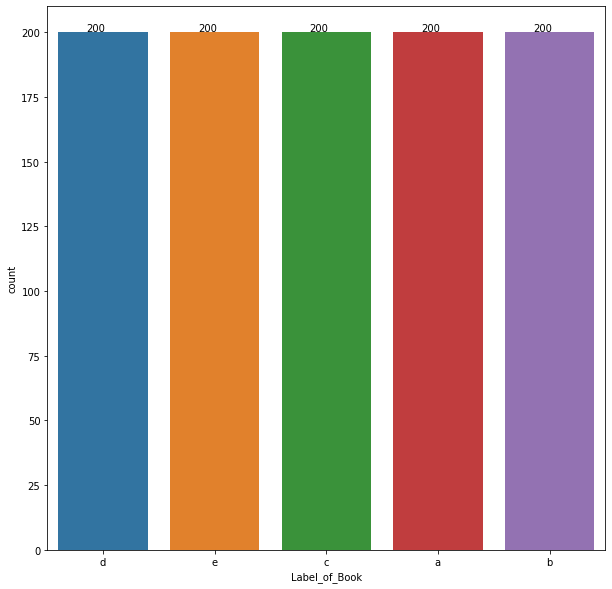

In [17]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.countplot(x=result["Label_of_Book"],  data=result, order = result["Label_of_Book"].value_counts().index )
for p, label in zip(ax.patches, result["Label_of_Book"].value_counts()):   
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

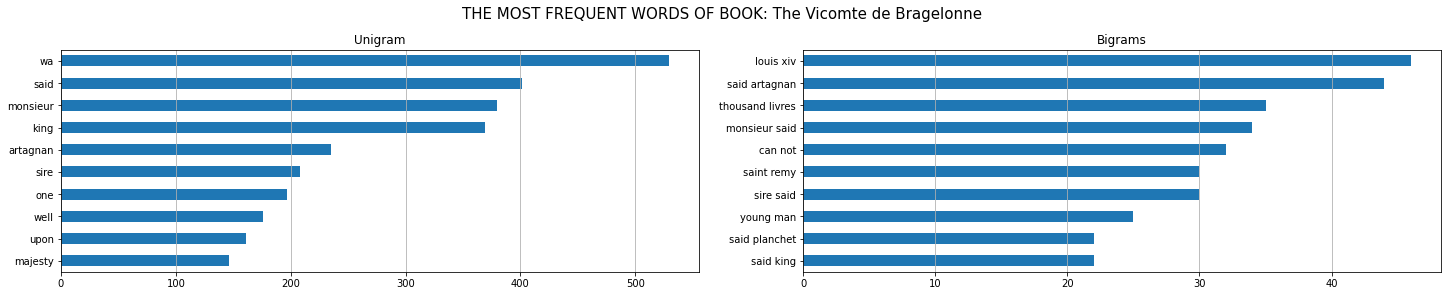

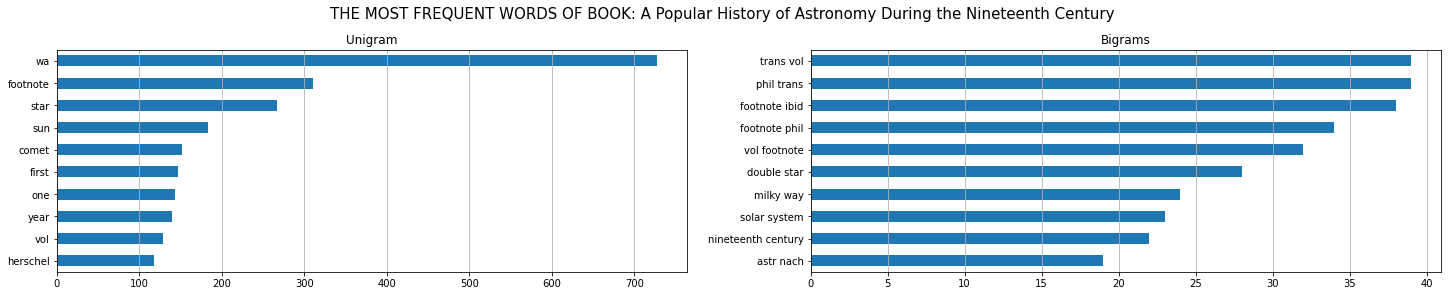

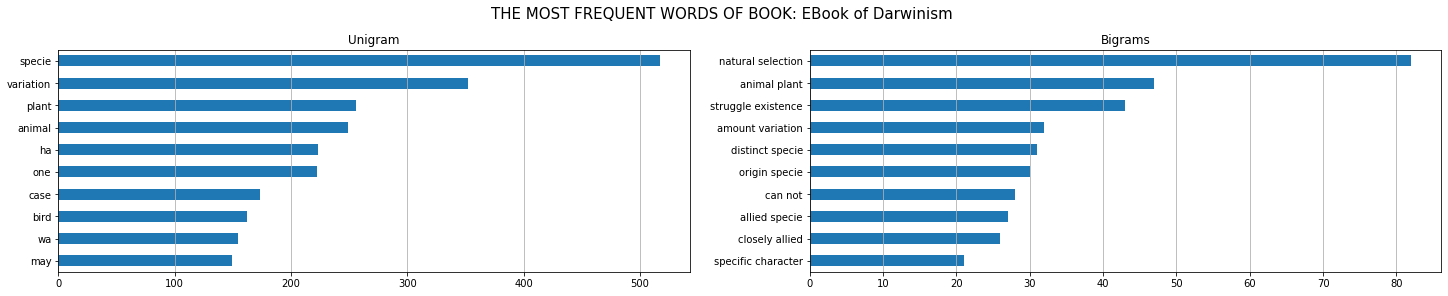

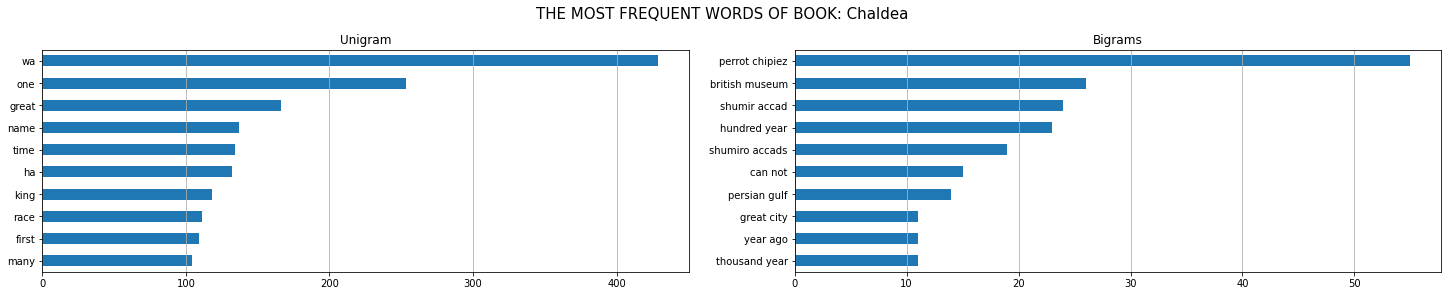

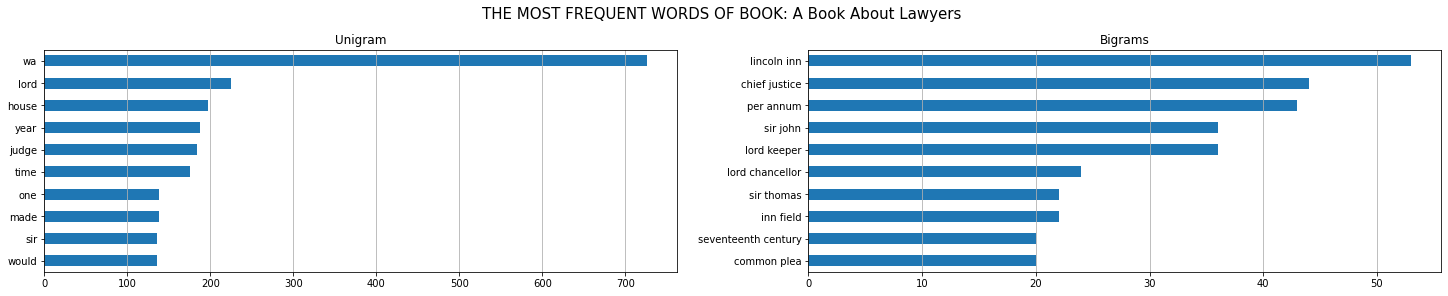

In [18]:
top= 10
for label in result['Title_of_Book'].unique():
    corpus = result[result["Title_of_Book"]==label]["PartitionsList"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    fig, ax = plt.subplots(nrows=1, ncols=2,constrained_layout=True, figsize=(20, 4))
    fig.suptitle(f"THE MOST FREQUENT WORDS OF BOOK: {label} ", fontsize=15)

    #to draw the unigram gragh
    dic_words_freq = nltk.FreqDist(lst_tokens)
    result_unigram = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    result_unigram.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigram", ax=ax[0], 
                    legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
    
    #to draw the bigram graph
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    result_bigram = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    result_bigram["Word"] = result_bigram["Word"].apply(lambda x: " ".join(
                    string for string in x) )
    result_bigram.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
    ax[1].set(ylabel=None)

make a wordcloud figure to get the most frequent 50 words in every book


 THE MOST FREQUENT 50 WORDS OF BOOK CALLED: The Vicomte de Bragelonne



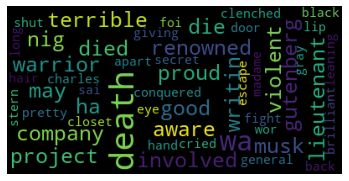


 THE MOST FREQUENT 50 WORDS OF BOOK CALLED: A Popular History of Astronomy During the Nineteenth Century



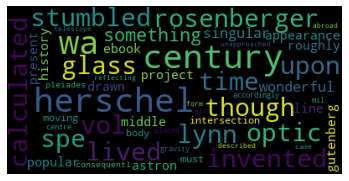


 THE MOST FREQUENT 50 WORDS OF BOOK CALLED: EBook of Darwinism



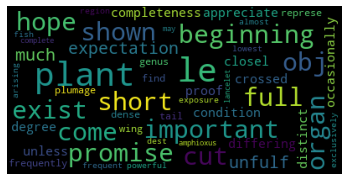


 THE MOST FREQUENT 50 WORDS OF BOOK CALLED: Chaldea



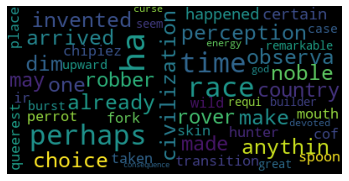


 THE MOST FREQUENT 50 WORDS OF BOOK CALLED: A Book About Lawyers



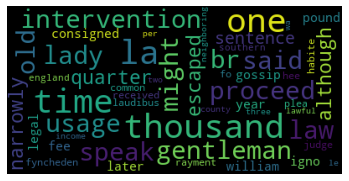

In [19]:
import wordcloud #Python wordcloud library to create tag clouds
import string
#for loop to take every unique book in the column of Title_of_Book 
for n in result['Title_of_Book'].unique():
  books = result[result["Title_of_Book"]==n]["PartitionsList"]
 #to print the most frequent 50 words of the unique book
  print(f"\n THE MOST FREQUENT 50 WORDS OF BOOK CALLED: {n}\n")
  WordCloudGragh = wordcloud.WordCloud(background_color='black', max_words=50, max_font_size=40)
  WordCloudGragh = WordCloudGragh.generate(str(books))
  plt.axis('off')
  plt.imshow(WordCloudGragh, cmap=None)
  plt.show()

#Step3: perform data transformation


1.   BOW
2.   TF-IDF
3.   LDA
4.   Word2Vec


## **1- BOW Transformation**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer #to Convert a collection of text documents to a matrix of token counts.

In [21]:
countVector= CountVectorizer()

A bag of words is a representation of text that describes the occurrence of words within a document.

In [22]:
#perform BOW transformation on the partitionslist column
BOWVector = countVector.fit_transform(result['PartitionsList'])

In [23]:
BOW = pd.DataFrame(BOWVector.toarray(), columns=countVector.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
#print Bag Of Words
BOW

,aaron,abandon,abandoned,abandoning,abandonment,abated,abb,abbe,abbey,abbott,...,zodiacal,zonal,zone,zool,zoologique,zoologist,zoology,zur,zwischen,zygomatic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **2- TF-IDF Transformation**

In [25]:
#to Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorizer = TfidfVectorizer()

Term frequency (TF) vectors show how important words are to documents. They are computed by using: 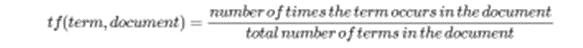

In [27]:
#to Transform result to document-term matrix.
TFIDF = vectorizer.fit_transform(result['PartitionsList'])

In [28]:
#transform it to array
TFIDF_Vector = pd.DataFrame(TFIDF.toarray(), columns=vectorizer.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
#print the TF-IDF vector
TFIDF_Vector

,aaron,abandon,abandoned,abandoning,abandonment,abated,abb,abbe,abbey,abbott,...,zodiacal,zonal,zone,zool,zoologique,zoologist,zoology,zur,zwischen,zygomatic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.058165,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.108353,0.0,0.0,0.000000,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


## **3- LDA Transformation**

LDA is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions. Each document is modeled as a multinomial distribution of topics and each topic is modeled as a multinomial distribution of words

In [30]:
import gensim
from gensim import models
from gensim.models.wrappers import LdaMallet
from gensim import corpora, models, similarities
from sklearn.decomposition import LatentDirichletAllocation

In [31]:
# create a dictionary of the book words
wordsDictionary = corpora.Dictionary(result['PartitionsList'].str.split())
corpus = [wordsDictionary.doc2bow(wordDic) for wordDic in result['PartitionsList'].str.split()]

In [32]:
#creating the LDA model
LDA_Model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = wordsDictionary,
                                           num_topics = 150,
                                           random_state = 100,
                                           update_every = 1,
                                           chunksize = 100, 
                                           passes = 10, 
                                           alpha = 'auto',
                                           per_word_topics = True)
predictionWords = LDA_Model.inference(corpus)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [33]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 13.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c948d1a08c2b5b9d1a6c951fcb5509ca79ca34ad337c1d68f16f07d49b9f9d47
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [34]:
# create a dictionary of the book words
wordsDictionary = corpora.Dictionary(result['PartitionsList'].str.split())
corpus = [wordsDictionary.doc2bow(wordDic) for wordDic in result['PartitionsList'].str.split()]

In [35]:
LDAModel = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = wordsDictionary,
                                           num_topics = 5,
                                           random_state = 100,
                                           update_every = 1,
                                           chunksize = 100, 
                                           passes = 10, 
                                           alpha = 'auto',
                                           per_word_topics = True)
PredictedWords = LDAModel.inference(corpus)

In [36]:
import pyLDAvis
import pyLDAvis.gensim_models as genisvis
pyLDAvis.enable_notebook()
visualization = genisvis.prepare(LDAModel, corpus, wordsDictionary)
visualization

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.056861  0.057567       1        1  32.020474
1      0.137751  0.113730       2        1  26.077108
4      0.153701  0.001188       3        1  18.676728
2     -0.010538 -0.239896       4        1  13.414266
3     -0.224053  0.067411       5        1   9.811424, topic_info=          Term        Freq       Total Category  logprob  loglift
412     specie  480.000000  480.000000  Default  30.0000  30.0000
132   footnote  317.000000  317.000000  Default  29.0000  29.0000
76        said  510.000000  510.000000  Default  28.0000  28.0000
786      plant  214.000000  214.000000  Default  27.0000  27.0000
429     animal  215.000000  215.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
1024     would   69.163110  454.013235   Topic5  -5.3603   0.4400
62         one   69.926632  843.974031   Topic5  -5.3493  -0.1691
372        may   58.983517  387.353517   Topic5  -5.5195   0.4395
870     number   53.045815  196.675374   Topic5  -5.6256   1.0112
898    another   51.740979  162.867172   Topic5  -5.6505   1.1749

[336 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
6986      5  0.933774   abundance
3218      4  0.973346       accad
2793      4  0.988475      accads
5077      1  0.076720  adaptation
5077      5  0.920640  adaptation
...     ...       ...         ...
110       2  0.989518         yes
426       1  0.005015       young
426       2  0.596736       young
426       3  0.250729       young
426       5  0.145423       young

[558 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 3, 4])

In [37]:
LDA = pd.DataFrame(list(PredictedWords[0]), columns=['1', '2','3','4', '5'])

In [38]:
LDA['res'] = LDA.idxmax(axis = 1)

In [39]:
LDA.head()

,1,2,3,4,5,res
0,0.382971,150.291748,0.099159,0.108863,0.193366,2
1,73.663849,0.353006,76.756157,0.108840,0.194242,3
2,15.125586,103.620941,0.099147,5.762621,26.467817,2
3,98.687546,19.553352,0.099162,32.542198,0.193849,1
4,20.809715,31.188311,28.462299,70.421387,0.194397,4


In [40]:
PredictedWords

(array([[3.82971406e-01, 1.50291748e+02, 9.91590917e-02, 1.08862661e-01,
         1.93366155e-01],
        [7.36638489e+01, 3.53006303e-01, 7.67561569e+01, 1.08840279e-01,
         1.94242373e-01],
        [1.51255856e+01, 1.03620941e+02, 9.91473272e-02, 5.76262093e+00,
         2.64678173e+01],
        ...,
        [9.44869537e+01, 7.81007576e+00, 9.91574451e-02, 4.52619514e+01,
         3.41796708e+00],
        [5.18354130e+00, 5.94436216e+00, 9.91600528e-02, 1.08865529e-01,
         1.39740173e+02],
        [6.60969849e+01, 2.72629414e+01, 5.74139977e+01, 1.08876474e-01,
         1.93289727e-01]], dtype=float32), None)

## **4- Word Embedding**

Word2Vec consists of models for generating word embedding. These models are shallow two-layer neural networks having one input layer, one hidden layer, and one output layer.

In [41]:
from gensim.models import Word2Vec

In [42]:
# split our partitionsList to a list of words
PartitionsToSplit = result['PartitionsList'].tolist()
SplittedList = [x.split() for x in PartitionsToSplit]

In [43]:
print(len(SplittedList))

1000


In [44]:
print(len(SplittedList[0]))

150


In [45]:
print(SplittedList[0])

['die', 'death', 'good', 'died', 'violent', 'death', 'terrible', 'night', 'rendered', 'passion', 'man', 'tempest', 'god', 'body', 'pierced', 'dagger', 'sank', 'depth', 'ocean', 'god', 'pardon', 'murderer', 'proceed', 'said', 'charles', 'seeing', 'count', 'wa', 'unwilling', 'say', 'king', 'england', 'said', 'spoken', 'thus', 'masked', 'executioner', 'added', 'observe', 'strike', 'till', 'shall', 'stretch', 'arm', 'saying', 'remember', 'wa', 'aware', 'said', 'charles', 'agitated', 'voice', 'wa', 'last', 'word', 'pronounced', 'unfortunate', 'father', 'french', 'gentleman', 'placed', 'beneath', 'scaffold', 'monsieur', 'yes', 'sire', 'every', 'one', 'word', 'spoke', 'plank', 'scaffold', 'covered', 'black', 'cloth', 'still', 'sound', 'ear', 'king', 'knelt', 'one', 'knee', 'comte', 'fere', 'said', 'yes', 'sire', 'replied', 'king', 'stooped', 'towards', 'board', 'charles', 'also', 'palpitating', 'interest', 'burning', 'grief', 'stooped', 'towards', 'athos', 'catch', 'one', 'one', 'every', 'wor

In [46]:
# build our word2vec model
word_2_vec_model = Word2Vec(SplittedList,
                            min_count= 1,
                            size= 150,
                            workers=6, 
                            window= 3,
                            sg= 1)
# save trained model
word_2_vec_model.save("word2vec.model")

/usr/local/lib/python3.7/dist-packages/gensim/utils.py:589: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  if hasattr(self, attrib):
/usr/local/lib/python3.7/dist-packages/gensim/utils.py:590: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  asides[attrib] = getattr(self, attrib)
/usr/local/lib/python3.7/dist-packages/gensim/utils.py:591: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  delattr(self, attrib)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/gensim/

In [47]:
def vectorize(list_of_docs, model):
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(SplittedList, model=word_2_vec_model)
X_emb = np.array(vectorized_docs)
len(vectorized_docs), len(vectorized_docs[0])

(1000, 150)

In [48]:
print(vectorized_docs[0])


[-0.004118   -0.16884248 -0.03185168  0.12455904  0.06568364 -0.00749716
  0.05775507  0.16011842 -0.0819823   0.11757457  0.03845329 -0.29101703
 -0.00510745  0.07693896 -0.02305539  0.04768525 -0.05899808 -0.30683059
  0.06826289 -0.02371941 -0.05453198 -0.1623254   0.14617117 -0.00162944
  0.04839873  0.01182093 -0.2718396  -0.03555341 -0.09903906 -0.07321394
 -0.08071084 -0.0112516  -0.09639952  0.07228776 -0.07503539 -0.22678728
  0.07359096 -0.08381489  0.13011862 -0.1781864  -0.02493335  0.05711136
 -0.08005428 -0.10424642  0.02571533  0.19078112 -0.06536358 -0.19954464
  0.12710403 -0.25548598  0.09703166 -0.06566193  0.07718673  0.01399735
 -0.12731384 -0.11910942 -0.12710753 -0.23075162  0.19136119  0.20683278
 -0.07445803 -0.09295005 -0.1873001  -0.06074761 -0.0595227  -0.21320857
 -0.16657211 -0.15379329  0.06966517 -0.09237316  0.00131253  0.09461132
 -0.10709728 -0.01640329 -0.05033704 -0.37444     0.12125168  0.1685425
  0.05911097  0.06750047 -0.16910215  0.15163131 -0.

# Step 4: Building the clustering algorithms


1.   K-means clustering algorithm
2.   Expectation Maximization(EM) algorithm
3.   Hierarchical clustering algorithm



T-distributed Stochastic Neighbor Embedding: for dimensionality reduction
Dimensionality reduction: is a good way to deal with the data that have many features, the TSNE is a good choice here.
TSNE used to reduce the number of dimensions to a reasonable amount if the number of features is very high. 

In [49]:
from sklearn.manifold import TSNE
def TSNEData(DesiredOutput):
  Tsna = TSNE(n_components= 2, random_state= 42)
  DataOfTSNE = Tsna.fit_transform(DesiredOutput) 
  return DataOfTSNE

## **1- Building K-means algorithm**

In [50]:
#Yellowbrick is a suite of visual analysis and diagnostic tools designed to facilitate machine learning with scikit-learn
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from sklearn.cluster import KMeans
def BuildingKMeansModel(clusters, X_data):
  kMeansModel= KMeans(n_clusters= clusters, init='k-means++', random_state=0)
  Y_Prediction = kMeansModel.fit_predict(X_data)
  return kMeansModel, Y_Prediction

## **2- Building Expectation Maximization(EM) algorithm**

Expectation-Maximization algorithm can be used for the latent variables (variables that are not directly observable and are actually inferred from the values of the other observed variables) too in order to predict their values with the condition that the general form of probability distribution governing those latent variables is known to us. This algorithm is actually at the base of many unsupervised clustering algorithms in the field of machine learning.

In [52]:
from sklearn.mixture import GaussianMixture
def BuildingExpectationMaximization(clusters, X_data):
  gm= GaussianMixture(n_components=clusters ,covariance_type= "spherical" ,n_init= 10 )
  Y_Prediction= gm.fit_predict(X_data)
  ProbabilityOfGM = gm.predict_proba(X_data)
  return gm, Y_Prediction, ProbabilityOfGM

## **3- Building Hierarchical clustering algorithm**

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
def BuildingHierarchicalClustering(clusters, X_data, title):
  plt.figure(figsize=(10, 7)) 
  plt.title(title) 
  dend= shc.dendrogram(shc.linkage(X_data, method='ward'))
  ag= AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')  
  Y_Prediction= ag.fit_predict(X_data)
  return ag, Y_Prediction

## **Make a function for clustering Visualization**

In [54]:
from scipy.sparse import csr_matrix
from numpy import concatenate

In [55]:
def ClusteringVisualization(ClusteringModel, result, Y_Prediction, em=True):
  # get centroids of kmeans cluster
  if em:
    centroids = np.empty(shape=(ClusteringModel.n_components, result.shape[1]))
  else:
    centroids = ClusteringModel.cluster_centers_

  # we want to transform the rows and the centroids
  # todense return matrix
  matrix_data = csr_matrix(result)
  all_Data = concatenate((matrix_data.todense(), centroids))

  n_clusters = 5

  plt.scatter([all_Data[:-n_clusters, 0]], [all_Data[:-n_clusters, 1]], c=Y_Prediction, cmap=plt.cm.Paired, marker= 'x')
  plt.scatter([all_Data[-n_clusters:, 0]], [all_Data[-n_clusters:, 1]], marker= 'o')
  plt.show()

In [56]:
from collections import Counter
def CountingClusters(predictedClusters):
  clustersNumber = Counter(predictedClusters)
  plt.bar(clustersNumber.keys(), clustersNumber.values())

##Building the three algorithms with the four Transformations

## **1- Building BOW with the 3 algorithms**

### **1.1 Building BOW with K-Means algorithm**

In [57]:
DataOfBOW = TSNEData(BOW)
KMeansWithBOW, KMeansWithBOWPrediction = BuildingKMeansModel(5,DataOfBOW)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [58]:
KMeansWithBOW.cluster_centers_.argsort()[:, ::-1]

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0]])

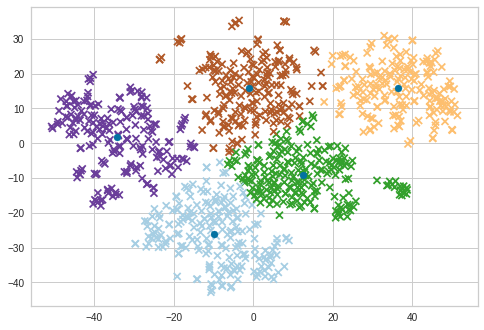

In [59]:
ClusteringVisualization(KMeansWithBOW, DataOfBOW, KMeansWithBOWPrediction,False)

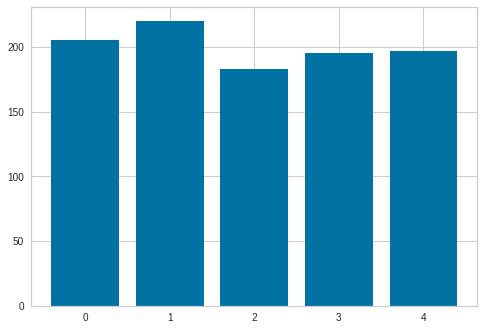

In [60]:
CountingClusters(KMeansWithBOWPrediction)

### **1.2 Building BOW with Expectation Maximization(EM) algorithm**

In [61]:
ExpectationMaximizationWithBOW, ExpectationMaximizationWithBOWPrediction, ExpectationMaximizationWithBOWProbability = BuildingExpectationMaximization(5,DataOfBOW)

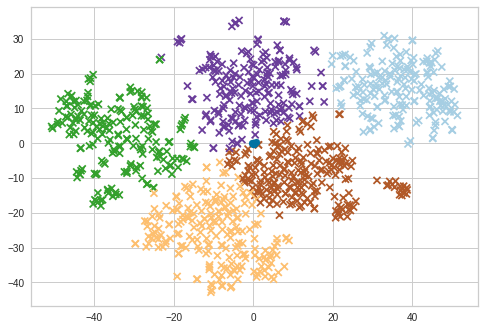

In [62]:
ClusteringVisualization(ExpectationMaximizationWithBOW, DataOfBOW, ExpectationMaximizationWithBOWPrediction,True)

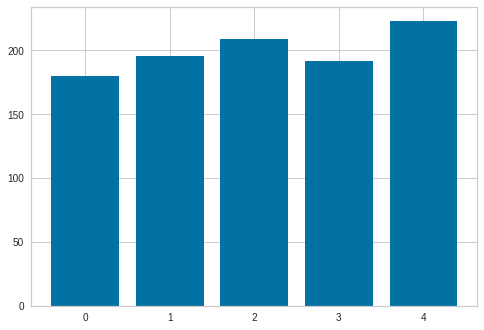

In [63]:
CountingClusters(ExpectationMaximizationWithBOWPrediction)

### **1.3 Building BOW with Hierarchical clustering algorithm**

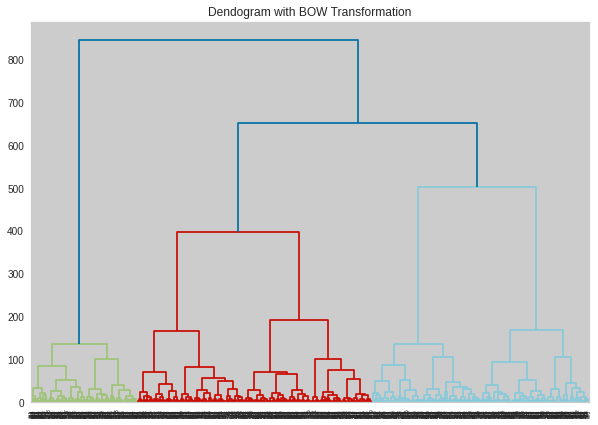

In [64]:
AgglomerativeClusteringWithBOW, AgglomerativeClusteringWithBOWPrediction= BuildingHierarchicalClustering(5, DataOfBOW,"Dendogram with BOW Transformation")

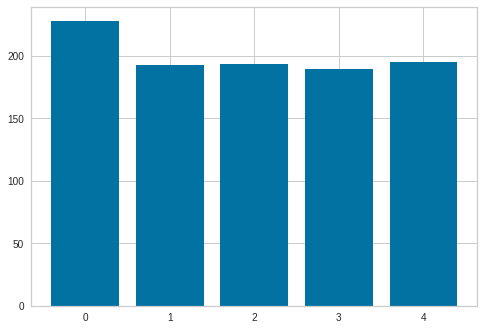

In [65]:
CountingClusters(AgglomerativeClusteringWithBOWPrediction)

## **2- Building TF-IDF with the 3 algorithms**

### **2.1 Building TF-IDF with K-Means algorithm**

In [66]:
DataOfTFIDF = TSNEData(TFIDF_Vector)
# tfidf_data_pca = data_with_pca(X_tfidf)
KMeansWithTFIDF, KMeansWithTFIDFPrediction = BuildingKMeansModel(5,DataOfTFIDF)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


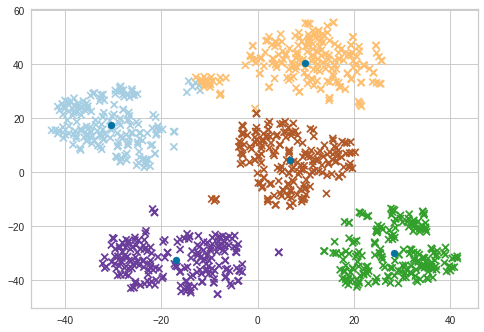

In [67]:
ClusteringVisualization(KMeansWithTFIDF, DataOfTFIDF, KMeansWithTFIDFPrediction,False)

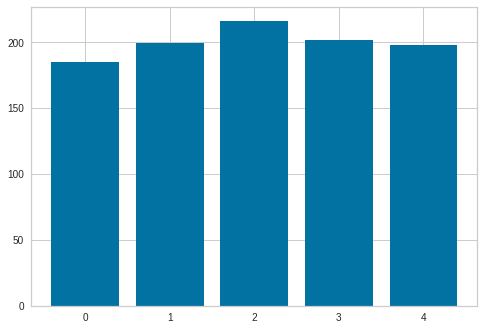

In [68]:
CountingClusters(KMeansWithTFIDFPrediction)

### **2.2 Building TF-IDF with Expectation Maximization(EM) algorithm**

In [69]:
ExpectationMaximizationWithTFIDF, ExpectationMaximizationWithTFIDFPrediction, ExpectationMaximizationWithTFIDFProbability = BuildingExpectationMaximization(5,DataOfTFIDF)

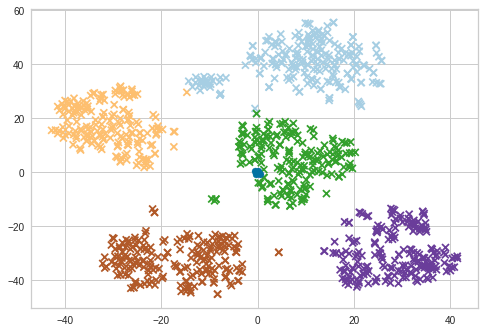

In [70]:
ClusteringVisualization(ExpectationMaximizationWithTFIDF, DataOfTFIDF, ExpectationMaximizationWithTFIDFPrediction,True)

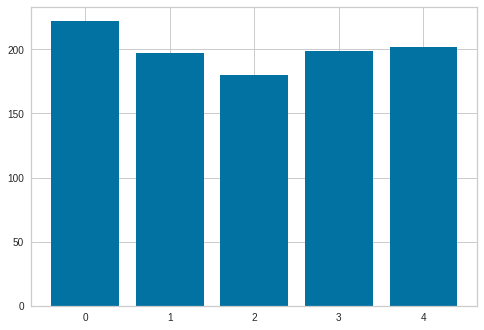

In [71]:
CountingClusters(ExpectationMaximizationWithTFIDFPrediction)

### **2.3 Building TF-IDF with Hierarchical clustering algorithm**

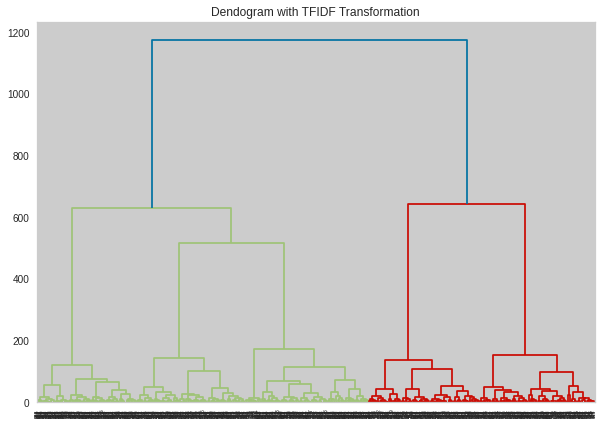

In [72]:
HierarchicalClusteringWithTFIDF, HierarchicalClusteringWithTFIDFPrediction= BuildingHierarchicalClustering(5, DataOfTFIDF,"Dendogram with TFIDF Transformation")

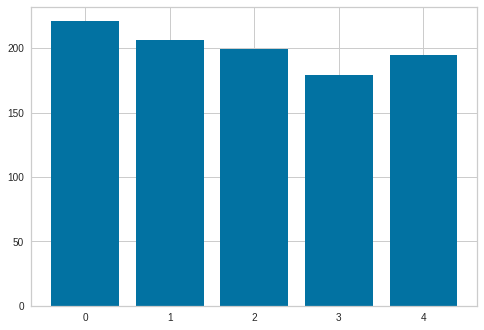

In [73]:
CountingClusters(HierarchicalClusteringWithTFIDFPrediction)

## **3- Building LDA with the 3 algorithms**

### **3.1 Building LDA with K-Means algorithm**

In [74]:
DataOfLDA = TSNEData(PredictedWords[0])
KMeansWithLDA, KMeansWithLDAPrediction = BuildingKMeansModel(5, DataOfLDA)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


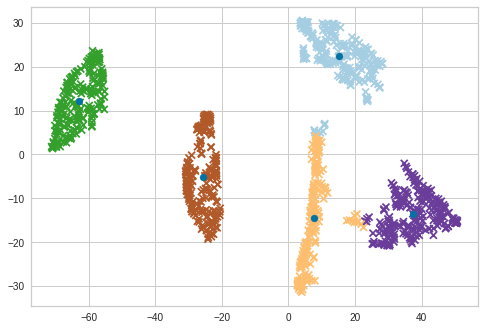

In [75]:
ClusteringVisualization(KMeansWithLDA, DataOfLDA, KMeansWithLDAPrediction,False)

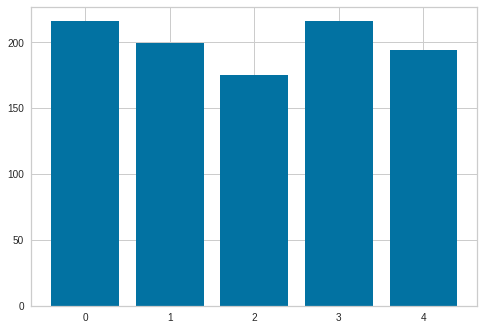

In [76]:
CountingClusters(KMeansWithLDAPrediction)

### **3.2 Building LDA with Expectation Maximization(EM) algorithm**

In [77]:
LDAWithExpectationMaximization, LDAWithExpectationMaximizationPrediction, LDAWithExpectationMaximizationProbability = BuildingExpectationMaximization(5, DataOfLDA)

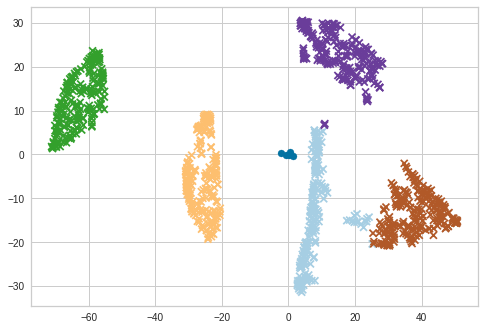

In [78]:
ClusteringVisualization(LDAWithExpectationMaximization, DataOfLDA, LDAWithExpectationMaximizationPrediction,True)

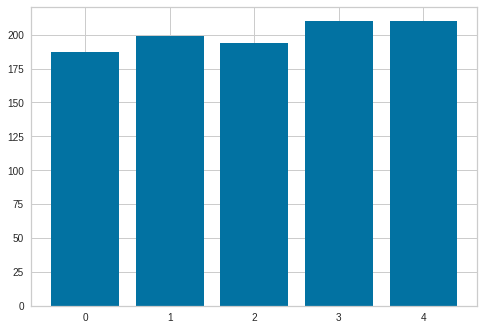

In [79]:
CountingClusters(LDAWithExpectationMaximizationPrediction)

### **3.3 Building LDA with Hierarchical clustering algorithm**

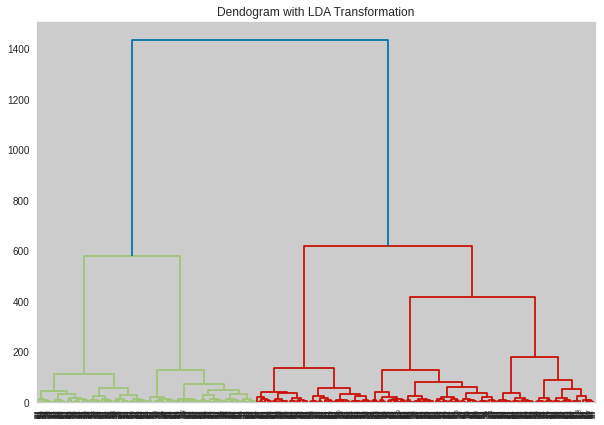

In [80]:
HierarchicalClusteringWithLDA, HierarchicalClusteringWithLDAPrediction= BuildingHierarchicalClustering(5, DataOfLDA, "Dendogram with LDA Transformation")

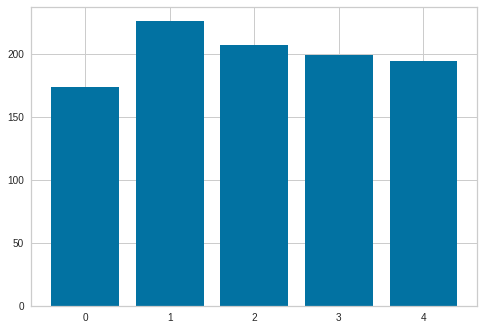

In [81]:
CountingClusters(HierarchicalClusteringWithLDAPrediction)

## **4- Building Word2Vec with the 3 algorithms**

### **4.1 Building Word2Vec with K-Means algorithm**

In [82]:
Wored2VecData = TSNEData(X_emb)
Wored2VecDataWithKMeans, Wored2VecDataWithKMeansPrediction = BuildingKMeansModel(5,Wored2VecData)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


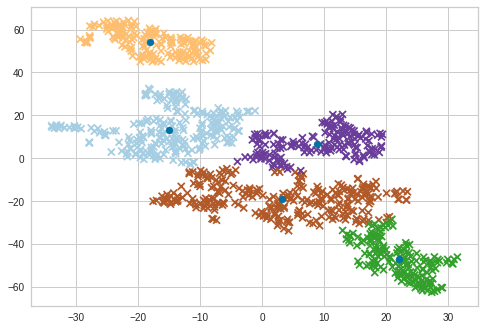

In [83]:
ClusteringVisualization(Wored2VecDataWithKMeans, Wored2VecData, Wored2VecDataWithKMeansPrediction,False)

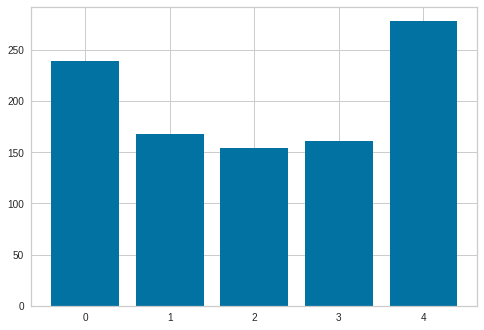

In [84]:
CountingClusters(Wored2VecDataWithKMeansPrediction)

### **4.2 Building Word2Vec with Expectation Maximization(EM) algorithm**

In [85]:
Word2VecWithExpectationMaximizationing, Word2VecWithExpectationMaximizationingPrediction, Word2VecWithExpectationMaximizationingProbability = BuildingExpectationMaximization(5,Wored2VecData)

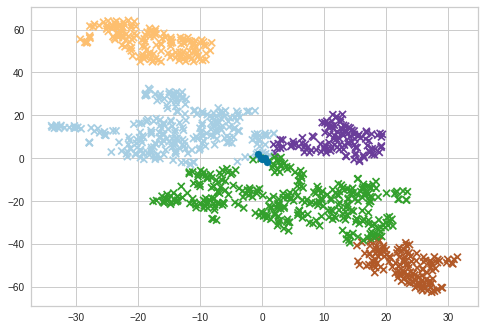

In [86]:
ClusteringVisualization(Word2VecWithExpectationMaximizationing, Wored2VecData, Word2VecWithExpectationMaximizationingPrediction,True)

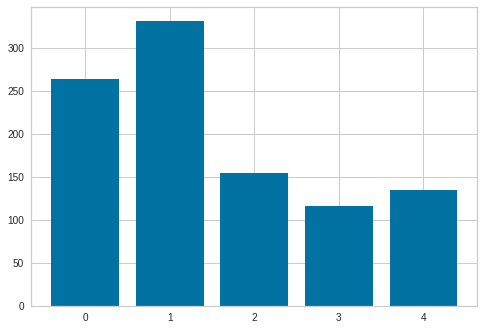

In [87]:
CountingClusters(Word2VecWithExpectationMaximizationingPrediction)

### **4.3 Building Word2Vec with Hierarichal Clustering algorithm**

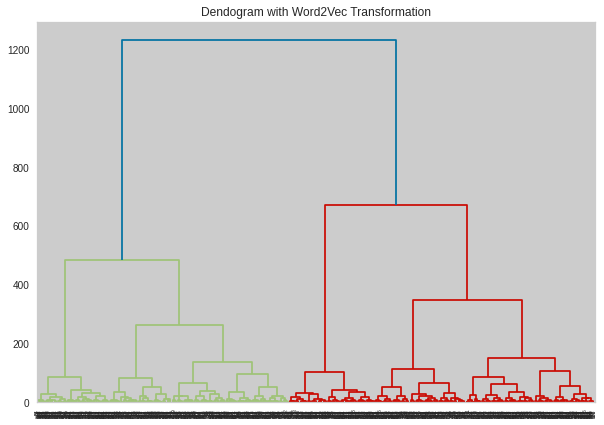

In [88]:
Word2VecWithHierarchicalClustering, Word2VecWithHierarchicalClusteringPrediction= BuildingHierarchicalClustering(5, Wored2VecData,"Dendogram with Word2Vec Transformation")


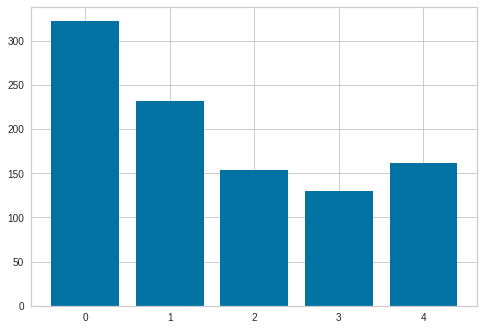

In [89]:
CountingClusters(Word2VecWithHierarchicalClusteringPrediction)

# **Step 5: Perform Evaluation**

## **1- Perform Kappa Evaluation against the true authors**

In [90]:
def majorityClass(rater_1, rater_2, k):
    label_cluster = 0
    Max = []
    for i in range(k):
        counter0= 0
        counter1=0
        counter2=0
        counter3=0
        counter4=0
        L = [] 
        for j in range(k):  
            for m in range(len(rater_2)):
                if (rater_1[m] == label_cluster) & (rater_2[m] == j) & (j == 0):
                    counter0 = counter0 + 1
                if (rater_1[m] == label_cluster) & (rater_2[m] == j) & (j == 1):
                    counter1 = counter1 + 1
                if (rater_1[m] == label_cluster) & (rater_2[m] == j) & (j == 2):
                    counter2 = counter2 + 1
                if (rater_1[m] == label_cluster) & (rater_2[m] == j) & (j == 3):
                    counter3 = counter3 + 1
                if (rater_1[m] == label_cluster) & (rater_2[m] == j) & (j == 4):
                    counter4 = counter4 + 1
        print("True_0 in cluster "+ str(label_cluster)+": " + str(counter0))
        print("True_0 in cluster "+ str(label_cluster)+": " +str(counter1))
        print("True_0 in cluster "+ str(label_cluster)+": " +str(counter2))
        print("True_0 in cluster "+ str(label_cluster)+": " +str(counter3))
        print("True_0 in cluster "+ str(label_cluster)+": " +str(counter4))
        L.append(counter0)
        L.append(counter1)
        L.append(counter2)
        L.append(counter3)
        L.append(counter4)
        idx = np.argmax(L)
        print(idx)
        Max.append(idx)
        label_cluster = label_cluster + 1
    return Max



In [91]:
def mapLabels(rater_1, Max, k):
    indices = [True]*len(rater_1)
    for l in range(k):
        for n in range(len(rater_1)):
            if indices[n] == True: 
                if rater_1[n] == l:
                    rater_1[n] = Max[l]
                    indices[n] = False
    return rater_1

In [92]:
from sklearn.metrics import cohen_kappa_score

In [93]:
LDAPrediction = LDA.loc[:,'res'].values

In [94]:
LDAPrediction = LDAPrediction.astype(int)

In [95]:
LDAPrediction

array([2, 3, 2, 1, 4, 1, 3, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 5, 1, 2, 3, 2,
       2, 2, 5, 3, 1, 3, 2, 5, 1, 3, 5, 2, 4, 5, 3, 1, 1, 3, 3, 3, 5, 1,
       1, 5, 2, 5, 5, 3, 5, 5, 3, 3, 2, 5, 1, 4, 5, 2, 1, 5, 1, 1, 3, 4,
       2, 3, 5, 1, 5, 1, 1, 2, 5, 1, 3, 3, 4, 2, 2, 1, 3, 3, 3, 5, 5, 4,
       2, 3, 1, 2, 2, 3, 2, 5, 5, 3, 2, 1, 1, 1, 4, 2, 1, 5, 4, 1, 3, 5,
       2, 1, 1, 2, 5, 3, 2, 3, 1, 1, 3, 4, 1, 1, 3, 1, 2, 5, 1, 5, 5, 1,
       2, 3, 4, 2, 2, 1, 2, 5, 5, 4, 1, 1, 5, 1, 5, 1, 3, 3, 2, 3, 2, 2,
       1, 5, 3, 5, 5, 5, 3, 1, 1, 3, 2, 2, 3, 5, 5, 1, 4, 4, 2, 1, 5, 3,
       4, 1, 1, 1, 2, 2, 3, 4, 1, 1, 4, 5, 1, 4, 2, 1, 4, 2, 3, 1, 5, 5,
       5, 2, 2, 1, 1, 5, 5, 1, 1, 4, 3, 3, 1, 5, 1, 3, 4, 1, 1, 4, 3, 2,
       3, 1, 5, 3, 3, 1, 1, 2, 1, 4, 1, 4, 5, 5, 1, 5, 5, 2, 1, 2, 5, 3,
       5, 4, 2, 1, 4, 1, 2, 2, 1, 2, 3, 4, 2, 1, 4, 3, 5, 1, 2, 1, 3, 5,
       2, 5, 5, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 2, 3, 1, 3, 2, 3,
       3, 2, 1, 1, 5, 1, 2, 1, 5, 2, 3, 5, 5, 3, 5,

### **1- Perform Kappa with K-means clustering Model**

In [96]:
Max = majorityClass(list(KMeansWithBOWPrediction), list(result['index']), 5)
KMeansWithBOWPrediction = mapLabels(list(KMeansWithBOWPrediction), Max, 5)

True_0 in cluster 0: 5
True_0 in cluster 0: 198
True_0 in cluster 0: 0
True_0 in cluster 0: 1
True_0 in cluster 0: 1
1
True_0 in cluster 1: 20
True_0 in cluster 1: 0
True_0 in cluster 1: 4
True_0 in cluster 1: 0
True_0 in cluster 1: 196
4
True_0 in cluster 2: 0
True_0 in cluster 2: 0
True_0 in cluster 2: 183
True_0 in cluster 2: 0
True_0 in cluster 2: 0
2
True_0 in cluster 3: 0
True_0 in cluster 3: 0
True_0 in cluster 3: 0
True_0 in cluster 3: 195
True_0 in cluster 3: 0
3
True_0 in cluster 4: 175
True_0 in cluster 4: 2
True_0 in cluster 4: 13
True_0 in cluster 4: 4
True_0 in cluster 4: 3
0


In [97]:
Max = majorityClass(list(KMeansWithTFIDFPrediction), list(result['index']), 5)
KMeansWithTFIDFPrediction = mapLabels(list(KMeansWithTFIDFPrediction), Max, 5)

True_0 in cluster 0: 1
True_0 in cluster 0: 0
True_0 in cluster 0: 0
True_0 in cluster 0: 0
True_0 in cluster 0: 184
4
True_0 in cluster 1: 0
True_0 in cluster 1: 0
True_0 in cluster 1: 0
True_0 in cluster 1: 199
True_0 in cluster 1: 0
3
True_0 in cluster 2: 3
True_0 in cluster 2: 0
True_0 in cluster 2: 199
True_0 in cluster 2: 0
True_0 in cluster 2: 14
2
True_0 in cluster 3: 1
True_0 in cluster 3: 199
True_0 in cluster 3: 0
True_0 in cluster 3: 1
True_0 in cluster 3: 1
1
True_0 in cluster 4: 195
True_0 in cluster 4: 1
True_0 in cluster 4: 1
True_0 in cluster 4: 0
True_0 in cluster 4: 1
0


In [98]:
Max = majorityClass(list(KMeansWithLDAPrediction), list(result['index']), 5)
KMeansWithLDAPrediction = mapLabels(list(KMeansWithLDAPrediction), Max, 5)

True_0 in cluster 0: 4
True_0 in cluster 0: 0
True_0 in cluster 0: 29
True_0 in cluster 0: 0
True_0 in cluster 0: 183
4
True_0 in cluster 1: 0
True_0 in cluster 1: 198
True_0 in cluster 1: 0
True_0 in cluster 1: 0
True_0 in cluster 1: 1
1
True_0 in cluster 2: 4
True_0 in cluster 2: 1
True_0 in cluster 2: 169
True_0 in cluster 2: 0
True_0 in cluster 2: 1
2
True_0 in cluster 3: 192
True_0 in cluster 3: 1
True_0 in cluster 3: 2
True_0 in cluster 3: 6
True_0 in cluster 3: 15
0
True_0 in cluster 4: 0
True_0 in cluster 4: 0
True_0 in cluster 4: 0
True_0 in cluster 4: 194
True_0 in cluster 4: 0
3


In [99]:
Max = majorityClass(list(Wored2VecDataWithKMeansPrediction), list(result['index']), 5)
Wored2VecDataWithKMeansPrediction = mapLabels(list(Wored2VecDataWithKMeansPrediction), Max, 5)

True_0 in cluster 0: 26
True_0 in cluster 0: 1
True_0 in cluster 0: 31
True_0 in cluster 0: 0
True_0 in cluster 0: 181
4
True_0 in cluster 1: 0
True_0 in cluster 1: 7
True_0 in cluster 1: 0
True_0 in cluster 1: 161
True_0 in cluster 1: 0
3
True_0 in cluster 2: 0
True_0 in cluster 2: 0
True_0 in cluster 2: 154
True_0 in cluster 2: 0
True_0 in cluster 2: 0
2
True_0 in cluster 3: 130
True_0 in cluster 3: 5
True_0 in cluster 3: 15
True_0 in cluster 3: 0
True_0 in cluster 3: 11
0
True_0 in cluster 4: 44
True_0 in cluster 4: 187
True_0 in cluster 4: 0
True_0 in cluster 4: 39
True_0 in cluster 4: 8
1


In [100]:
print("Kappa Score of K-means With BOW Transformation:  {:.5f}".format(cohen_kappa_score(result['index'],KMeansWithBOWPrediction)))
print("Kappa Score of K-means With TFIDF Transformation:  {:.5f}".format(cohen_kappa_score(result['index'],KMeansWithTFIDFPrediction)))
print("Kappa Score of K-means With LDA Transformation:  {:.5f}".format(cohen_kappa_score(result['index'],KMeansWithLDAPrediction)))
print("Kappa Score of K-means With Word2Vec Transformation:  {:.5f}".format(cohen_kappa_score(result['index'],Wored2VecDataWithKMeansPrediction)))


Kappa Score of K-means With BOW Transformation:  0.93375
Kappa Score of K-means With TFIDF Transformation:  0.97000
Kappa Score of K-means With LDA Transformation:  0.92000
Kappa Score of K-means With Word2Vec Transformation:  0.76625


In [101]:
print("Kappa Score of LDA as Topic Modeling:  {:.5f}".format(cohen_kappa_score(result['index'], LDAPrediction)))

Kappa Score of LDA as Topic Modeling:  -0.18481


### **2- Perform Kappa with Expectation Maximization(EM) clustering Model**

In [102]:
Max = majorityClass(list(ExpectationMaximizationWithBOWPrediction), list(result['index']), 5)
ExpectationMaximizationWithBOWPrediction = mapLabels(list(ExpectationMaximizationWithBOWPrediction), Max, 5)

True_0 in cluster 0: 0
True_0 in cluster 0: 0
True_0 in cluster 0: 180
True_0 in cluster 0: 0
True_0 in cluster 0: 0
2
True_0 in cluster 1: 0
True_0 in cluster 1: 0
True_0 in cluster 1: 0
True_0 in cluster 1: 196
True_0 in cluster 1: 0
3
True_0 in cluster 2: 5
True_0 in cluster 2: 198
True_0 in cluster 2: 0
True_0 in cluster 2: 2
True_0 in cluster 2: 4
1
True_0 in cluster 3: 171
True_0 in cluster 3: 2
True_0 in cluster 3: 14
True_0 in cluster 3: 2
True_0 in cluster 3: 3
0
True_0 in cluster 4: 24
True_0 in cluster 4: 0
True_0 in cluster 4: 6
True_0 in cluster 4: 0
True_0 in cluster 4: 193
4


In [103]:
Max = majorityClass(list(ExpectationMaximizationWithTFIDFPrediction), list(result['index']), 5)
ExpectationMaximizationWithTFIDFPrediction = mapLabels(list(ExpectationMaximizationWithTFIDFPrediction), Max, 5)

True_0 in cluster 0: 4
True_0 in cluster 0: 0
True_0 in cluster 0: 199
True_0 in cluster 0: 0
True_0 in cluster 0: 19
2
True_0 in cluster 1: 194
True_0 in cluster 1: 1
True_0 in cluster 1: 1
True_0 in cluster 1: 0
True_0 in cluster 1: 1
0
True_0 in cluster 2: 1
True_0 in cluster 2: 0
True_0 in cluster 2: 0
True_0 in cluster 2: 0
True_0 in cluster 2: 179
4
True_0 in cluster 3: 0
True_0 in cluster 3: 0
True_0 in cluster 3: 0
True_0 in cluster 3: 199
True_0 in cluster 3: 0
3
True_0 in cluster 4: 1
True_0 in cluster 4: 199
True_0 in cluster 4: 0
True_0 in cluster 4: 1
True_0 in cluster 4: 1
1


In [104]:
Max = majorityClass(list(LDAWithExpectationMaximizationPrediction), list(result['index']), 5)
LDAWithExpectationMaximizationPrediction = mapLabels(list(LDAWithExpectationMaximizationPrediction), Max, 5)

True_0 in cluster 0: 10
True_0 in cluster 0: 1
True_0 in cluster 0: 175
True_0 in cluster 0: 0
True_0 in cluster 0: 1
2
True_0 in cluster 1: 0
True_0 in cluster 1: 198
True_0 in cluster 1: 0
True_0 in cluster 1: 0
True_0 in cluster 1: 1
1
True_0 in cluster 2: 0
True_0 in cluster 2: 0
True_0 in cluster 2: 0
True_0 in cluster 2: 194
True_0 in cluster 2: 0
3
True_0 in cluster 3: 4
True_0 in cluster 3: 0
True_0 in cluster 3: 23
True_0 in cluster 3: 0
True_0 in cluster 3: 183
4
True_0 in cluster 4: 186
True_0 in cluster 4: 1
True_0 in cluster 4: 2
True_0 in cluster 4: 6
True_0 in cluster 4: 15
0


In [105]:
Max = majorityClass(list(Word2VecWithExpectationMaximizationingPrediction), list(result['index']), 5)
Word2VecWithExpectationMaximizationingPrediction = mapLabels(list(Word2VecWithExpectationMaximizationingPrediction), Max, 5)

True_0 in cluster 0: 44
True_0 in cluster 0: 1
True_0 in cluster 0: 34
True_0 in cluster 0: 0
True_0 in cluster 0: 185
4
True_0 in cluster 1: 64
True_0 in cluster 1: 194
True_0 in cluster 1: 0
True_0 in cluster 1: 65
True_0 in cluster 1: 8
1
True_0 in cluster 2: 0
True_0 in cluster 2: 0
True_0 in cluster 2: 154
True_0 in cluster 2: 0
True_0 in cluster 2: 0
2
True_0 in cluster 3: 92
True_0 in cluster 3: 5
True_0 in cluster 3: 12
True_0 in cluster 3: 0
True_0 in cluster 3: 7
0
True_0 in cluster 4: 0
True_0 in cluster 4: 0
True_0 in cluster 4: 0
True_0 in cluster 4: 135
True_0 in cluster 4: 0
3


In [106]:
print("Kappa Score of Expectation Maximization With BOW Transformation:  {:.5f}".format(cohen_kappa_score(result['index'],ExpectationMaximizationWithBOWPrediction)))
print("Kappa Score of Expectation Maximization With TFIDF Transformation:  {:.5f}".format(cohen_kappa_score(result['index'],ExpectationMaximizationWithTFIDFPrediction)))
print("Kappa Score of Expectation Maximization With LDA Transformation:  {:.5f}".format(cohen_kappa_score(result['index'],LDAWithExpectationMaximizationPrediction)))
print("Kappa Score of Expectation Maximization With Word2Vec Transformation:  {:.5f}".format(cohen_kappa_score(result['index'],Word2VecWithExpectationMaximizationingPrediction)))


Kappa Score of Expectation Maximization With BOW Transformation:  0.92250
Kappa Score of Expectation Maximization With TFIDF Transformation:  0.96250
Kappa Score of Expectation Maximization With LDA Transformation:  0.92000
Kappa Score of Expectation Maximization With Word2Vec Transformation:  0.70000


### **3- perform Kappa with Hierarchical clustering Model**

Cohen’s kappa: a statistic that measures inter-annotator agreement.

In [107]:
Max = majorityClass(list(AgglomerativeClusteringWithBOWPrediction), list(result['index']), 5)
AgglomerativeClusteringWithBOWPrediction = mapLabels(list(AgglomerativeClusteringWithBOWPrediction), Max, 5)

True_0 in cluster 0: 23
True_0 in cluster 0: 4
True_0 in cluster 0: 4
True_0 in cluster 0: 0
True_0 in cluster 0: 197
4
True_0 in cluster 1: 0
True_0 in cluster 1: 192
True_0 in cluster 1: 0
True_0 in cluster 1: 1
True_0 in cluster 1: 0
1
True_0 in cluster 2: 0
True_0 in cluster 2: 2
True_0 in cluster 2: 0
True_0 in cluster 2: 190
True_0 in cluster 2: 2
3
True_0 in cluster 3: 1
True_0 in cluster 3: 0
True_0 in cluster 3: 189
True_0 in cluster 3: 0
True_0 in cluster 3: 0
2
True_0 in cluster 4: 176
True_0 in cluster 4: 2
True_0 in cluster 4: 7
True_0 in cluster 4: 9
True_0 in cluster 4: 1
0


In [108]:
Max = majorityClass(list(HierarchicalClusteringWithTFIDFPrediction), list(result['index']), 5)
HierarchicalClusteringWithTFIDFPrediction = mapLabels(list(HierarchicalClusteringWithTFIDFPrediction), Max, 5)

True_0 in cluster 0: 3
True_0 in cluster 0: 0
True_0 in cluster 0: 198
True_0 in cluster 0: 0
True_0 in cluster 0: 20
2
True_0 in cluster 1: 2
True_0 in cluster 1: 200
True_0 in cluster 1: 1
True_0 in cluster 1: 1
True_0 in cluster 1: 2
1
True_0 in cluster 2: 0
True_0 in cluster 2: 0
True_0 in cluster 2: 0
True_0 in cluster 2: 199
True_0 in cluster 2: 0
3
True_0 in cluster 3: 1
True_0 in cluster 3: 0
True_0 in cluster 3: 0
True_0 in cluster 3: 0
True_0 in cluster 3: 178
4
True_0 in cluster 4: 194
True_0 in cluster 4: 0
True_0 in cluster 4: 1
True_0 in cluster 4: 0
True_0 in cluster 4: 0
0


In [109]:
Max = majorityClass(list(Word2VecWithHierarchicalClusteringPrediction), list(result['index']), 5)
Word2VecWithHierarchicalClusteringPrediction = mapLabels(list(Word2VecWithHierarchicalClusteringPrediction), Max, 5)

True_0 in cluster 0: 48
True_0 in cluster 0: 193
True_0 in cluster 0: 0
True_0 in cluster 0: 70
True_0 in cluster 0: 11
1
True_0 in cluster 1: 22
True_0 in cluster 1: 1
True_0 in cluster 1: 31
True_0 in cluster 1: 0
True_0 in cluster 1: 178
4
True_0 in cluster 2: 0
True_0 in cluster 2: 0
True_0 in cluster 2: 154
True_0 in cluster 2: 0
True_0 in cluster 2: 0
2
True_0 in cluster 3: 0
True_0 in cluster 3: 0
True_0 in cluster 3: 0
True_0 in cluster 3: 130
True_0 in cluster 3: 0
3
True_0 in cluster 4: 130
True_0 in cluster 4: 6
True_0 in cluster 4: 15
True_0 in cluster 4: 0
True_0 in cluster 4: 11
0


In [110]:
Max = majorityClass(list(HierarchicalClusteringWithLDAPrediction), list(result['index']), 5)
HierarchicalClusteringWithLDAPrediction = mapLabels(list(HierarchicalClusteringWithLDAPrediction), Max, 5)

True_0 in cluster 0: 0
True_0 in cluster 0: 1
True_0 in cluster 0: 170
True_0 in cluster 0: 0
True_0 in cluster 0: 3
2
True_0 in cluster 1: 196
True_0 in cluster 1: 1
True_0 in cluster 1: 8
True_0 in cluster 1: 6
True_0 in cluster 1: 15
0
True_0 in cluster 2: 4
True_0 in cluster 2: 0
True_0 in cluster 2: 22
True_0 in cluster 2: 0
True_0 in cluster 2: 181
4
True_0 in cluster 3: 0
True_0 in cluster 3: 198
True_0 in cluster 3: 0
True_0 in cluster 3: 0
True_0 in cluster 3: 1
1
True_0 in cluster 4: 0
True_0 in cluster 4: 0
True_0 in cluster 4: 0
True_0 in cluster 4: 194
True_0 in cluster 4: 0
3


In [111]:
print("Kappa Score of Hierarchical clustering With BOW  Transformation:  {:.5f}".format(cohen_kappa_score(result['index'],AgglomerativeClusteringWithBOWPrediction)))
print("Kappa Score of Hierarchical clustering With TFIDF Transformation:  {:.5f}".format(cohen_kappa_score(result['index'],HierarchicalClusteringWithTFIDFPrediction)))
print("Kappa Score of Hierarchical clustering With Word2Vec Transformation:  {:.5f}".format(cohen_kappa_score(result['index'],Word2VecWithHierarchicalClusteringPrediction)))
print("Kappa Score of Hierarchical clustering With LDA Transformation:  {:.5f}".format(cohen_kappa_score(result['index'],HierarchicalClusteringWithLDAPrediction)))

Kappa Score of Hierarchical clustering With BOW  Transformation:  0.93000
Kappa Score of Hierarchical clustering With TFIDF Transformation:  0.96125
Kappa Score of Hierarchical clustering With Word2Vec Transformation:  0.73125
Kappa Score of Hierarchical clustering With LDA Transformation:  0.92375


## **2- Perform consistency with the V-Score Evaluation against the true authors**

### **1- Perform consistency with K-means clustering Model**

V-measure cluster labeling given a ground truth.


In [112]:
from sklearn.metrics.cluster import v_measure_score
v_measure_score(result['index'],KMeansWithBOWPrediction)

0.8662283275565226

In [113]:
v_measure_score(result['index'],KMeansWithTFIDFPrediction)

0.9311297591368249

In [114]:
v_measure_score(result['index'],KMeansWithLDAPrediction)

0.8510310833159215

In [115]:
v_measure_score(result['index'],Wored2VecDataWithKMeansPrediction)

0.6478281782226814

### **2- Perform consistency with Expectation Maximization(EM) clustering Model**

In [116]:
v_measure_score(result['index'],ExpectationMaximizationWithBOWPrediction)

0.8486319934232456

In [117]:
v_measure_score(result['index'],ExpectationMaximizationWithTFIDFPrediction)

0.9208257845672432

In [118]:
v_measure_score(result['index'],LDAWithExpectationMaximizationPrediction)

0.8463715921601145

In [119]:
v_measure_score(result['index'],Word2VecWithExpectationMaximizationingPrediction)

0.6131630314889325

### **3- perform consistency with Hierarchical clustering Model**

In [120]:
v_measure_score(result['index'],AgglomerativeClusteringWithBOWPrediction)

0.8564273602857926

In [121]:
v_measure_score(result['index'],HierarchicalClusteringWithTFIDFPrediction)

0.919735298350901

In [122]:
v_measure_score(result['index'],Word2VecWithHierarchicalClusteringPrediction)

0.629342888528116

In [123]:
v_measure_score(result['index'],HierarchicalClusteringWithLDAPrediction)

0.8521412057858038

## **3- Perform Coherence Evaluation against the true authors**

In [124]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import CoherenceModel

In [125]:
print('\nPerplexity score: ', LDA_Model.log_perplexity(corpus))  

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity score:  -37.1307779995505


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [126]:
CoheranceModelEvaluation = CoherenceModel(model= LDA_Model, texts= SplittedList, dictionary=wordsDictionary, coherence='c_v')
CoheranceModelEvaluationUmass = CoherenceModel(model= LDA_Model, texts= SplittedList, dictionary=wordsDictionary, coherence='u_mass')

In [127]:
CoheranceModelValue = round(CoheranceModelEvaluation.get_coherence(), 4)  # get coherence value
CoheranceModelUmass = round(CoheranceModelEvaluationUmass.get_coherence(), 4)  # get coherence value

In [128]:
print("\nCoherence score With LDA using c_v: {}".format(CoheranceModelValue))
print("\nCoherence score With LDA using u_mass: {}".format(CoheranceModelUmass))


Coherence score With LDA using c_v: 0.4517

Coherence score With LDA using u_mass: -8.2195


In [129]:
print('\nPerplexity score: ', LDAModel.log_perplexity(corpus))  

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity score:  -8.31006684777379


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [130]:
CoheranceModelEvaluation = CoherenceModel(model= LDAModel, texts= SplittedList, dictionary=wordsDictionary, coherence='c_v')
CoheranceModelEvaluationUmass = CoherenceModel(model= LDAModel, texts= SplittedList, dictionary=wordsDictionary, coherence='u_mass')

In [131]:
CoheranceModelValue = round(CoheranceModelEvaluation.get_coherence(), 4)  # get coherence value
CoheranceModelUmass = round(CoheranceModelEvaluationUmass.get_coherence(), 4)  # get coherence value

In [132]:
print("\nCoherence score With LDA using c_v: {}".format(CoheranceModelValue))
print("\nCoherence score With LDA using u_mass: {}".format(CoheranceModelUmass))


Coherence score With LDA using c_v: 0.5239

Coherence score With LDA using u_mass: -1.5792


## **4- Perform Silhouette Evaluation against the true authors**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. 
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

In [133]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [134]:
def KMeansSilhouetteVisualization(X_data, model, title):
  visualizerOfSilhouette = SilhouetteVisualizer(model, colors='yellowbrick')
  visualizerOfSilhouette.fit(X_data)
  plt.title("Silhouette Score of K-means With " + title)

### **3.1 Perform Silhouette evaluation with K-Means clustering model**

In [135]:
print("Silhouette Score of K-means With BOW Transformation:  {:.5f}".format(silhouette_score(DataOfBOW, KMeansWithBOWPrediction)))
print("Silhouette Score of K-means With TFIDF Transformation:  {:.5f}".format(silhouette_score(DataOfTFIDF, KMeansWithTFIDFPrediction)))
print("Silhouette Score of K-means With LDA Transformation:  {:.5f}".format(silhouette_score(DataOfLDA, KMeansWithLDAPrediction)))
print("Silhouette Score of K-means With Word2Vec Transformation:  {:.5f}".format(silhouette_score(Wored2VecData, Wored2VecDataWithKMeansPrediction)))


Silhouette Score of K-means With BOW Transformation:  0.47390
Silhouette Score of K-means With TFIDF Transformation:  0.62751
Silhouette Score of K-means With LDA Transformation:  0.68171
Silhouette Score of K-means With Word2Vec Transformation:  0.52727


#### **3.1.1 Perform Silhouette evaluation with K-Means clustering model with BOW Transformation**

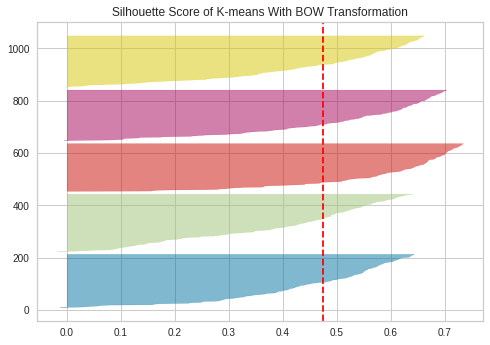

In [136]:
KMeansSilhouetteVisualization(DataOfBOW, KMeansWithBOW,"BOW Transformation");

#### **3.1.2 Perform Silhouette evaluation with K-Means clustering model with TFIDF Transformation**

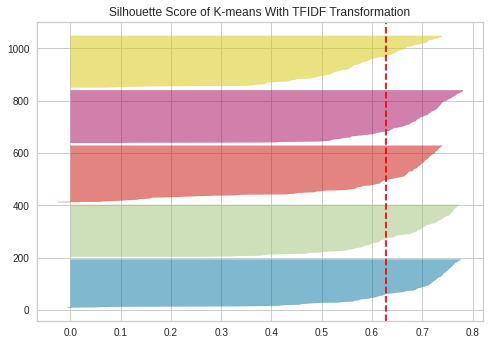

In [137]:
KMeansSilhouetteVisualization(DataOfTFIDF, KMeansWithTFIDF, "TFIDF Transformation");

#### **3.1.3 Perform Silhouette evaluation with K-Means clustering model with LDA Transformation**

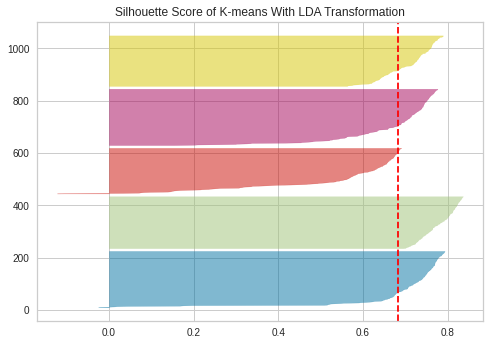

In [138]:
KMeansSilhouetteVisualization(DataOfLDA, KMeansWithLDA,"LDA Transformation");

#### **3.1.4 Perform Silhouette evaluation with K-Means clustering model with Word2Vec Transformation**

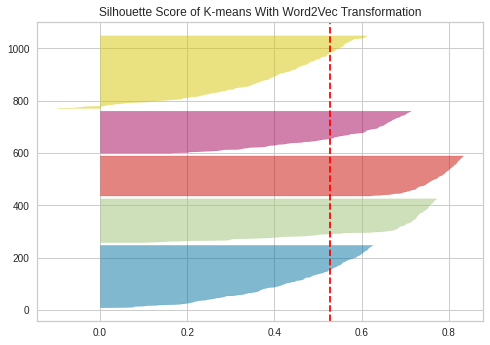

In [139]:
KMeansSilhouetteVisualization(Wored2VecData, Wored2VecDataWithKMeans, "Word2Vec Transformation");

### **3.2 Perform Silhouette evaluation with Expectation Maximization (EM) clustering model**

In [140]:
print("Silhouette Score of Expectation Maximization With BOW Transformation:  {:.5f}".format(silhouette_score(DataOfBOW, ExpectationMaximizationWithBOWPrediction)))
print("Silhouette Score of Expectation Maximization With TFIDF Transformation:  {:.5f}".format(silhouette_score(DataOfTFIDF, ExpectationMaximizationWithTFIDFPrediction)))
print("Silhouette Score of Expectation Maximization With LDA Transformation:  {:.5f}".format(silhouette_score(DataOfLDA, LDAWithExpectationMaximizationPrediction)))
print("Silhouette Score of Expectation Maximization With Word2Vec Transformation:  {:.5f}".format(silhouette_score(Wored2VecData, Word2VecWithExpectationMaximizationingPrediction)))

Silhouette Score of Expectation Maximization With BOW Transformation:  0.47210
Silhouette Score of Expectation Maximization With TFIDF Transformation:  0.62732
Silhouette Score of Expectation Maximization With LDA Transformation:  0.67946
Silhouette Score of Expectation Maximization With Word2Vec Transformation:  0.50030


### **3.3 Perform Silhouette evaluation with Hierarchical clustering model**

In [141]:
print("Silhouette Score of Hierarchical clustering With BOW Transformation:  {:.5f}".format(silhouette_score(DataOfBOW, AgglomerativeClusteringWithBOWPrediction)))
print("Silhouette Score of Hierarchical clustering With TFIDF Transformation:  {:.5f}".format(silhouette_score(DataOfTFIDF, HierarchicalClusteringWithTFIDFPrediction)))
print("Silhouette Score of Hierarchical clustering With LDA Transformation:  {:.5f}".format(silhouette_score(DataOfLDA, HierarchicalClusteringWithLDAPrediction)))
print("Silhouette Score of Hierarchical clustering With Word2Vec Transformation:  {:.5f}".format(silhouette_score(Wored2VecData, Word2VecWithHierarchicalClusteringPrediction)))

Silhouette Score of Hierarchical clustering With BOW Transformation:  0.46664
Silhouette Score of Hierarchical clustering With TFIDF Transformation:  0.62647
Silhouette Score of Hierarchical clustering With LDA Transformation:  0.68016
Silhouette Score of Hierarchical clustering With Word2Vec Transformation:  0.50312


# **Step 6: Error analysis**

## **6.1 Print the silhouette scores**

In [142]:
from sklearn.metrics import silhouette_score ,silhouette_samples #to Compute the mean Silhouette Coefficient of all samples.
import matplotlib.cm as cm

In [143]:
RangeOfClusters = [ 3, 4, 5, 6, 7, 8] #define the range of clusters
SilhouetteScores = []

For NumOfClusters = 3 The average of the silhouette score is : 0.55211806 

For NumOfClusters = 4 The average of the silhouette score is : 0.62230855 

For NumOfClusters = 5 The average of the silhouette score is : 0.6817061 

For NumOfClusters = 6 The average of the silhouette score is : 0.6668709 

For NumOfClusters = 7 The average of the silhouette score is : 0.6415718 

For NumOfClusters = 8 The average of the silhouette score is : 0.59958994 



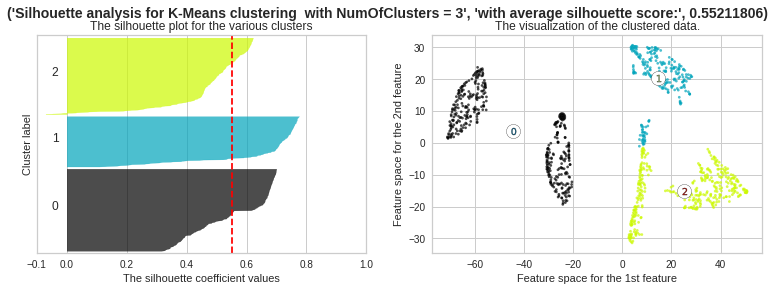

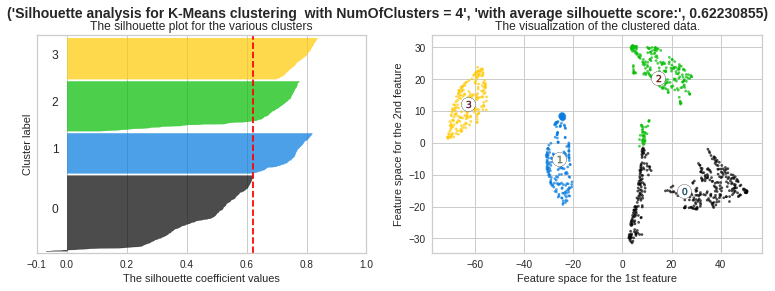

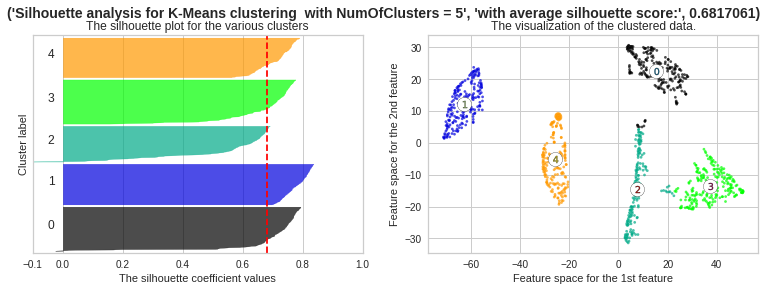

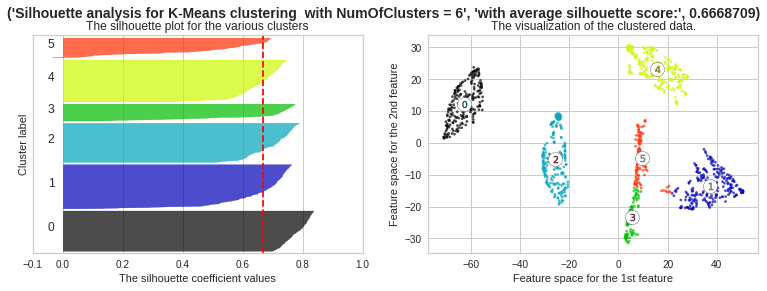

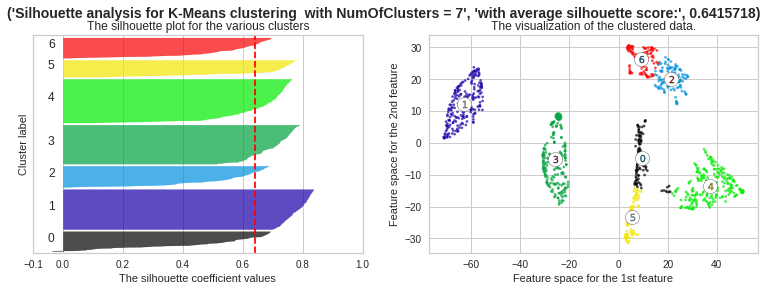

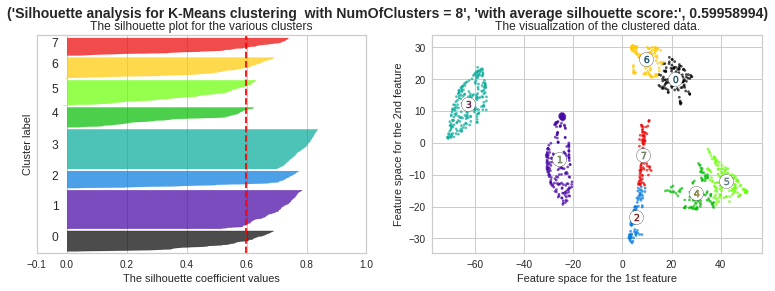

In [154]:
#for loop on the range of the clusters to draw the silhouette score and samples 
for NumOfClusters in RangeOfClusters:
    #To create a subplot of 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(13, 4)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(DataOfLDA) + (NumOfClusters + 1) * 10])
    #define the clusters of K-means clustering model
    clusters = KMeans(n_clusters=NumOfClusters, random_state=10)
    #to define the cluster labels to predict
    cluster_labels = clusters.fit_predict(DataOfLDA)
    AverageOfSilhouette = silhouette_score(DataOfLDA, cluster_labels)
    SilhouetteScores.append(AverageOfSilhouette)
    #to print thr average number of silhouette score
    print("For NumOfClusters =", NumOfClusters, "The average of the silhouette score is :", AverageOfSilhouette ,"\n")
    #To compute the silhouette scores for each sample
    SilhouetteValuesSamples = silhouette_samples(DataOfLDA, cluster_labels)
    y_lower = 10
    for i in range(NumOfClusters):
        SilhouetteValues = \
            SilhouetteValuesSamples[cluster_labels == i]
        #sort the values of sillhouette 
        SilhouetteValues.sort()
        ClusterSize = SilhouetteValues.shape[0]
        #set the value of y_upper
        y_upper = y_lower + ClusterSize
        color = cm.nipy_spectral(float(i) / NumOfClusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, SilhouetteValues, facecolor=color, edgecolor=color, alpha=0.7)
        #define the labels of silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * ClusterSize, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=AverageOfSilhouette, color="red", linestyle="--") #vertical line for the average silhouette score of all the values
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    #to show the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / NumOfClusters)
    ax2.scatter(DataOfLDA[:, 0], DataOfLDA[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    #to label the clusters based on the center value
    centers = clusters.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k') 
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    #to set the titles of x and y labels
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for K-Means clustering  " "with NumOfClusters = %d" % NumOfClusters ,"with average silhouette score:", AverageOfSilhouette ), fontsize=14, fontweight='bold')
plt.show()

## **6.2 Create analysis data frame for the true label and predicted label**

In [155]:
def ResultAnalysis (FeatureEngineeringResults , result):
  AnalysisDataFrame = result[['PartitionsList', 'Label_of_Book' , "index" ]]
  AnalysisDataFrame['clustersOutput'] = FeatureEngineeringResults
  return AnalysisDataFrame

## **6.3 count the number of matches between most frequent words in clusters and true labels**


In [156]:
from collections import Counter
def MostCommonWords(NumberOfWords ,DataFrameName , Label , ResultColumn):
  wordsList = []
  #for loop to extract the unique labels
  for l in DataFrameName[Label].unique():
    wl = DataFrameName[DataFrameName[Label]==l][ResultColumn]
    wordsList.append(wl)
  clustersLabel= []
  for c in range(len(wordsList)):
    label = []
    for doc in wordsList[c]:
      text = ""
      text += doc
      text += " "
      label.append(text)
    clustersLabel.append(label)

  ContentOfCluster = []
  for i in range(len(clustersLabel)):
    AllText = ""
    for j in range(len(clustersLabel[i])):
      AllText += clustersLabel[i][j]
      AllText += " "
    ContentOfCluster.append(AllText)

  MostCommonWords = []
  WeightForMostCommonWords = []
 #for loop to Pass the classSplit list to the instance of Counter class.
  for cc in range(len(ContentOfCluster)):
    WordList =[]
    WeightList = []
    string = ContentOfCluster[cc]
    ClassSplit = string.split()               
    Count = Counter(ClassSplit)            
    MostOccurrance = Count.most_common(NumberOfWords)
    #define the most occurence weights 
    for m in range(len(MostOccurrance)): 
      mostOcc =  MostOccurrance[m][0]
      weights = MostOccurrance[m][1]
      WordList.append(mostOcc)
      WeightList.append(weights)

    MostCommonWords.append(WordList)
    WeightForMostCommonWords.append(WeightList)
  return MostCommonWords , WeightForMostCommonWords

## **6.3 Create a disctionary of matches labels and matches weights**

In [157]:
def MatchingLabels(MostCommonLabels , MostCommonClusters):
  LabelsClustersMatches = {}
  for i in range(len(MostCommonLabels)):
    score = []
    for j in range(len(MostCommonClusters)):
      matches = len(set(MostCommonLabels[i]) & set(MostCommonClusters[j]))
      score.append(matches)
    LabelsClustersMatches[i] = score 
  return LabelsClustersMatches
# Create  disctionary of matches weights
def WeightsDictionary(MostCommonLabels , MostCommonClusters ,MostCommonClustersWeights ):
  LabelsClustersMatchesWeights = {}
  for i in range(len(MostCommonLabels)):
    score = []
    for j in range(len(MostCommonClustersWeights)):
      matches = len(set(MostCommonLabels[i]) & set(MostCommonClusters[j]))
      weight = sum(MostCommonClustersWeights[j][0:matches])
      score.append(weight)
    LabelsClustersMatchesWeights[i] = score 
  return LabelsClustersMatchesWeights

#show a list of the most frequent words and there weights
def WeightForMostCommonWords(labelList , WList):
  MostFrequentWordsWeight = []
  for i  in range(len(labelList)):
    lst = []
    for x, y in zip(labelList[i], WList[i]):
      element = [x ,y]
      z= tuple(element)
      lst.append(z)
    MostFrequentWordsWeight.append(lst)   
  return MostFrequentWordsWeight

In [158]:
AnalysisDataFrame = ResultAnalysis(KMeansWithLDAPrediction , result)
AnalysisDataFrame

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PartitionsList,Label_of_Book,index,clustersOutput
143,die death good died violent death terrible nig...,d,3,3
177,vol rosenberger calculated though lived lynn o...,e,4,0
166,proud company renowned warrior lieutenant musk...,d,3,3
157,shown exist beginning important organ come obj...,c,2,2
62,full promise cut short hope expectation unfulf...,c,2,2
...,...,...,...,...
108,saying wa wrong proving wa right going king tu...,d,3,3
92,may occur respective district plant common alm...,c,2,2
12,general belief regarding time darwin book firs...,c,2,2
36,queen street rural quality crossing holborn la...,b,1,1


In [159]:
output = list(AnalysisDataFrame.clustersOutput) 
true_label = list(AnalysisDataFrame['index'])

In [160]:
print(output)

[3, 0, 3, 2, 2, 4, 0, 2, 2, 0, 3, 2, 4, 4, 4, 3, 2, 1, 4, 3, 0, 0, 3, 3, 1, 0, 2, 0, 3, 1, 4, 0, 1, 3, 2, 1, 0, 4, 2, 0, 0, 0, 1, 4, 0, 1, 3, 1, 1, 0, 1, 1, 0, 0, 3, 1, 4, 2, 1, 3, 4, 1, 4, 4, 0, 2, 3, 0, 1, 4, 1, 4, 4, 3, 1, 4, 0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 1, 2, 3, 0, 4, 3, 3, 0, 3, 1, 1, 0, 3, 4, 4, 2, 2, 3, 4, 1, 2, 4, 0, 1, 3, 4, 2, 3, 1, 0, 3, 0, 2, 4, 0, 2, 4, 2, 0, 4, 3, 1, 4, 1, 1, 4, 3, 0, 2, 0, 3, 4, 3, 1, 1, 2, 4, 4, 1, 4, 1, 4, 0, 0, 3, 0, 3, 3, 4, 1, 0, 1, 1, 1, 0, 0, 4, 0, 3, 3, 0, 1, 1, 2, 2, 2, 3, 4, 1, 0, 2, 4, 4, 4, 3, 3, 0, 2, 4, 2, 2, 1, 4, 2, 3, 4, 0, 3, 0, 4, 1, 1, 1, 3, 0, 4, 4, 1, 1, 4, 4, 2, 0, 0, 4, 1, 4, 0, 2, 4, 4, 2, 0, 3, 0, 4, 1, 0, 0, 2, 2, 3, 4, 2, 4, 2, 1, 1, 4, 1, 1, 3, 2, 3, 1, 0, 1, 2, 3, 4, 2, 4, 3, 3, 4, 3, 0, 2, 3, 4, 2, 0, 1, 2, 3, 4, 0, 1, 3, 1, 1, 0, 4, 4, 4, 4, 2, 4, 0, 4, 4, 4, 2, 4, 3, 0, 4, 0, 3, 0, 0, 3, 4, 4, 1, 4, 3, 4, 1, 3, 0, 1, 1, 0, 1, 3, 1, 3, 1, 0, 1, 0, 2, 4, 4, 4, 2, 2, 2, 2, 0, 4, 4, 2, 0, 3, 0, 4, 0, 4, 2, 4, 4, 3, 2, 2, 1, 

In [161]:
print(true_label)

[3, 4, 3, 2, 2, 4, 0, 2, 2, 3, 3, 2, 0, 2, 4, 3, 2, 1, 4, 3, 0, 0, 3, 3, 1, 0, 2, 0, 3, 1, 2, 0, 1, 3, 2, 1, 4, 4, 2, 0, 0, 0, 1, 4, 2, 1, 3, 1, 1, 0, 1, 1, 0, 0, 3, 1, 4, 2, 1, 3, 4, 1, 4, 4, 4, 2, 3, 0, 1, 2, 1, 4, 4, 3, 1, 4, 0, 0, 0, 3, 3, 0, 0, 0, 3, 1, 1, 2, 3, 0, 4, 3, 3, 0, 3, 1, 1, 0, 3, 4, 4, 2, 2, 3, 4, 1, 2, 4, 0, 1, 3, 2, 4, 3, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 0, 4, 3, 1, 4, 1, 1, 2, 3, 0, 2, 0, 3, 4, 3, 1, 1, 2, 4, 4, 1, 4, 1, 2, 0, 0, 3, 0, 3, 3, 4, 1, 0, 1, 1, 1, 0, 0, 4, 0, 3, 3, 0, 1, 1, 2, 2, 2, 3, 4, 1, 0, 2, 4, 4, 2, 3, 3, 0, 2, 4, 2, 2, 1, 4, 2, 3, 4, 0, 3, 0, 4, 1, 1, 1, 3, 0, 4, 4, 1, 1, 4, 4, 2, 0, 0, 4, 1, 4, 2, 2, 2, 4, 2, 0, 3, 0, 4, 1, 0, 0, 2, 2, 3, 4, 2, 4, 2, 1, 1, 4, 1, 1, 3, 2, 3, 1, 0, 1, 2, 3, 4, 2, 2, 3, 3, 4, 3, 0, 2, 3, 4, 2, 0, 1, 2, 3, 4, 0, 1, 3, 1, 1, 0, 2, 4, 4, 4, 2, 4, 0, 4, 4, 4, 2, 4, 3, 3, 4, 0, 3, 0, 0, 3, 4, 4, 1, 4, 3, 2, 1, 3, 0, 1, 1, 4, 1, 3, 1, 3, 1, 0, 1, 4, 2, 2, 4, 2, 2, 2, 2, 2, 0, 4, 4, 1, 0, 3, 0, 4, 0, 2, 2, 4, 4, 3, 2, 2, 1, 

In [162]:
L=[]
for i in range(len(true_label)):
  if output[i] != true_label[i]:
    L.append(i)
print(L)
AnalysisDataFrame = AnalysisDataFrame.iloc[L, :]
AnalysisDataFrame

[1, 9, 12, 13, 30, 36, 44, 64, 69, 84, 111, 112, 119, 122, 131, 147, 179, 213, 215, 247, 268, 281, 293, 299, 307, 309, 311, 319, 325, 358, 369, 389, 390, 397, 404, 438, 443, 445, 455, 498, 500, 519, 534, 542, 621, 623, 630, 644, 658, 661, 685, 699, 703, 704, 716, 739, 751, 814, 848, 870, 892, 941, 952, 958]


,PartitionsList,Label_of_Book,index,clustersOutput
177,vol rosenberger calculated though lived lynn o...,e,4,0
3,may aware project gutenberg ha involved writin...,d,3,0
189,dim perception already arrived perhaps observa...,a,0,4
71,body much exception part agree large marked in...,c,2,4
81,considerable number spread varying distance si...,c,2,4
...,...,...,...,...
174,beneficial le beneficial le size body would be...,c,2,4
25,wa thus recognised domain far reaching specula...,e,4,1
50,trans vol footnote ibid vol cvii footnote bull...,e,4,0
175,dissipation extinction footnote footnote allge...,e,4,0


In [163]:
MostCommonLabels , MostFrequentLabelsWeight  = MostCommonWords (25, AnalysisDataFrame, "index","PartitionsList")
MostCommonClusters,MostCommonClustersWeights = MostCommonWords( 25, AnalysisDataFrame, "clustersOutput", "PartitionsList")

In [164]:
LabelsClustersMatches = MatchingLabels(MostCommonLabels , MostCommonClusters)
LabelsClustersMatches

{0: [14, 2, 2, 2],
 1: [9, 1, 2, 1],
 2: [3, 4, 14, 2],
 3: [0, 23, 3, 0],
 4: [5, 3, 3, 1]}

In [165]:
LabelsClustersWeights = WeightsDictionary(MostCommonLabels ,MostCommonClusters , MostCommonClustersWeights)
LabelsClustersWeights

{0: [837, 193, 27, 10],
 1: [729, 144, 27, 8],
 2: [508, 287, 102, 10],
 3: [0, 870, 38, 0],
 4: [593, 241, 38, 8]}

In [152]:
CommonLabels = WeightForMostCommonWords(MostCommonLabels,MostFrequentLabelsWeight)
print("\n The Most Frequent words with its occurancies through the actual class \n")
print("most frequent words in label : 0  \n ", CommonLabels[0] ,"\n")
print("most frequent words in label : 1  \n ", CommonLabels[1] ,"\n")
print("most frequent words in label : 2  \n ", CommonLabels[2] ,"\n")
print("most frequent words in label : 3  \n ", CommonLabels[3] ,"\n")
print("most frequent words in label : 4  \n ", CommonLabels[4] ,"\n")


 The Most Frequent words with its occurancies through the actual class 

most frequent words in label : 0  
  [('wa', 529), ('said', 401), ('monsieur', 380), ('king', 369), ('artagnan', 235), ('sire', 208), ('one', 197), ('well', 176), ('upon', 161), ('majesty', 146), ('man', 143), ('two', 143), ('would', 136), ('ha', 133), ('planchet', 129), ('know', 122), ('good', 119), ('yes', 116), ('louis', 115), ('say', 113), ('without', 112), ('hand', 111), ('time', 110), ('shall', 107), ('day', 106)] 

most frequent words in label : 1  
  [('wa', 728), ('footnote', 310), ('star', 267), ('sun', 183), ('comet', 152), ('first', 147), ('one', 143), ('year', 139), ('vol', 129), ('herschel', 118), ('time', 118), ('body', 107), ('observation', 106), ('system', 104), ('astronomy', 101), ('two', 101), ('solar', 99), ('light', 96), ('may', 90), ('great', 88), ('ha', 86), ('discovery', 84), ('object', 83), ('however', 82), ('result', 81)] 

most frequent words in label : 2  
  [('specie', 517), ('variati

In [153]:
CommonLabelsWeights = WeightForMostCommonWords(MostCommonClusters,MostCommonClustersWeights)
print("\n The Most Frequent words with its occurancies through the actual cluster \n")
print("most frequent words in cluster : 0  \n ", CommonLabelsWeights[0] ,"\n")
print("most frequent words in cluster : 1  \n ", CommonLabelsWeights[1] ,"\n")
print("most frequent words in cluster : 2  \n ", CommonLabelsWeights[2] ,"\n")
print("most frequent words in cluster : 3  \n ", CommonLabelsWeights[3] ,"\n")
print("most frequent words in cluster : 4  \n ", CommonLabelsWeights[4] ,"\n")


 The Most Frequent words with its occurancies through the actual cluster 

most frequent words in cluster : 0  
  [('wa', 526), ('said', 400), ('monsieur', 379), ('king', 364), ('sire', 208), ('artagnan', 208), ('one', 195), ('well', 175), ('upon', 161), ('majesty', 145), ('two', 140), ('would', 136), ('man', 134), ('planchet', 126), ('ha', 126), ('know', 122), ('good', 119), ('yes', 116), ('say', 112), ('without', 111), ('hand', 110), ('louis', 110), ('shall', 107), ('time', 107), ('day', 104)] 

most frequent words in cluster : 1  
  [('wa', 430), ('footnote', 300), ('one', 252), ('vol', 169), ('great', 161), ('time', 136), ('name', 136), ('ha', 133), ('king', 123), ('first', 121), ('year', 120), ('race', 109), ('chapter', 103), ('many', 100), ('even', 100), ('city', 97), ('may', 92), ('land', 91), ('also', 89), ('could', 89), ('must', 88), ('work', 87), ('found', 86), ('ancient', 83), ('called', 83)] 

most frequent words in cluster : 2  
  [('specie', 466), ('plant', 256), ('anima

In [166]:
AnalysisDataFrame

,PartitionsList,Label_of_Book,index,clustersOutput
177,vol rosenberger calculated though lived lynn o...,e,4,0
3,may aware project gutenberg ha involved writin...,d,3,0
189,dim perception already arrived perhaps observa...,a,0,4
71,body much exception part agree large marked in...,c,2,4
81,considerable number spread varying distance si...,c,2,4
...,...,...,...,...
174,beneficial le beneficial le size body would be...,c,2,4
25,wa thus recognised domain far reaching specula...,e,4,1
50,trans vol footnote ibid vol cvii footnote bull...,e,4,0
175,dissipation extinction footnote footnote allge...,e,4,0


In [167]:
L=[]
for i in range(len(AnalysisDataFrame)):
  for j in range(i+1,len(AnalysisDataFrame)):
    record1 = set(AnalysisDataFrame.iloc[i, 0].split(' '))
    record2 = set(AnalysisDataFrame.iloc[j, 0].split(' '))
    intersect = record1.intersection(record2)
    L.append(intersect)
    print(intersect)


{'one'}
{'light', 'one', 'observation', 'star', 'wa', 'astronomy', 'visible', 'world'}
{'seems', 'hind', 'one', 'much', 'wa', 'head', 'seen'}
{'one', 'increase', 'considerable', 'million', 'extended'}
{'astronomy', 'march', 'note', 'star'}
{'footnote', 'trans', 'vol', 'xvi'}
{'mem', 'lynn', 'footnote', 'astr', 'herschel', 'observatory', 'annuaire', 'astronomy', 'viii', 'trans', 'note', 'phil', 'vol', 'xiv', 'nach'}
{'tail'}
{'world', 'xvi', 'wa', 'xiii', 'viii', 'note', 'xiv'}
{'wa', 'one', 'much'}
{'light', 'seems', 'herschel', 'one', 'star', 'wa', 'visible', 'seen', 'extended'}
{'one', 'indicated', 'considerable', 'wa', 'seen'}
{'seems', 'near', 'one', 'tail'}
{'much', 'observation', 'tail', 'considerable'}
{'though', 'one', 'indicated', 'outline', 'tail', 'similar', 'result', 'etc', 'seen', 'extended'}
{'one', 'vol'}
{'note', 'etc'}
{'considerable', 'noticed', 'tail', 'hind'}
{'seems', 'one', 'increase', 'considerable', 'wa'}
{'one', 'increase', 'near', 'wa', 'note', 'head', 'extend

In [168]:
print(L)

[{'one'}, {'light', 'one', 'observation', 'star', 'wa', 'astronomy', 'visible', 'world'}, {'seems', 'hind', 'one', 'much', 'wa', 'head', 'seen'}, {'one', 'increase', 'considerable', 'million', 'extended'}, {'astronomy', 'march', 'note', 'star'}, {'footnote', 'trans', 'vol', 'xvi'}, {'mem', 'lynn', 'footnote', 'astr', 'herschel', 'observatory', 'annuaire', 'astronomy', 'viii', 'trans', 'note', 'phil', 'vol', 'xiv', 'nach'}, {'tail'}, {'world', 'xvi', 'wa', 'xiii', 'viii', 'note', 'xiv'}, {'wa', 'one', 'much'}, {'light', 'seems', 'herschel', 'one', 'star', 'wa', 'visible', 'seen', 'extended'}, {'one', 'indicated', 'considerable', 'wa', 'seen'}, {'seems', 'near', 'one', 'tail'}, {'much', 'observation', 'tail', 'considerable'}, {'though', 'one', 'indicated', 'outline', 'tail', 'similar', 'result', 'etc', 'seen', 'extended'}, {'one', 'vol'}, {'note', 'etc'}, {'considerable', 'noticed', 'tail', 'hind'}, {'seems', 'one', 'increase', 'considerable', 'wa'}, {'one', 'increase', 'near', 'wa', 'no

## **6.4 Most common words with their repeat count in all records that were labelled uncorrectly according to the human label**

In [169]:
from collections import Counter
C = Counter(x for xs in L for x in xs)
print(C)

Counter({'one': 630, 'wa': 496, 'ha': 378, 'part': 378, 'may': 325, 'specie': 325, 'number': 325, 'variation': 300, 'case': 276, 'two': 253, 'see': 210, 'amount': 210, 'large': 190, 'fact': 171, 'even': 171, 'vol': 153, 'specimen': 153, 'size': 153, 'first': 153, 'also': 136, 'three': 136, 'great': 136, 'almost': 136, 'character': 136, 'among': 120, 'body': 120, 'individual': 120, 'organ': 120, 'much': 105, 'footnote': 105, 'trans': 105, 'many': 105, 'bird': 105, 'thus': 105, 'considerable': 91, 'phil': 91, 'different': 91, 'form': 91, 'long': 91, 'show': 91, 'length': 91, 'would': 91, 'every': 91, 'small': 91, 'illustration': 91, 'must': 91, 'natural': 91, 'tail': 78, 'order': 78, 'year': 78, 'given': 78, 'life': 78, 'diagram': 78, 'give': 78, 'nature': 78, 'wing': 78, 'observation': 66, 'star': 66, 'note': 66, 'however': 66, 'time': 66, 'could': 66, 'mean': 66, 'ibid': 66, 'chapter': 66, 'present': 66, 'vary': 66, 'little': 66, 'found': 66, 'astronomy': 55, 'work': 55, 'eye': 55, 'fi

In [171]:
print("Most common words with their repeat count in all records that were labelled uncorrectly according to the human label:\n")
print(C.most_common(25))

Most common words with their repeat count in all records that were labelled uncorrectly according to the human label:

[('one', 630), ('wa', 496), ('ha', 378), ('part', 378), ('may', 325), ('specie', 325), ('number', 325), ('variation', 300), ('case', 276), ('two', 253), ('see', 210), ('amount', 210), ('large', 190), ('fact', 171), ('even', 171), ('vol', 153), ('specimen', 153), ('size', 153), ('first', 153), ('also', 136), ('three', 136), ('great', 136), ('almost', 136), ('character', 136), ('among', 120)]


In [172]:
import nltk
from nltk.collocations import *

nltk.download('genesis')
bigram_measures = nltk.collocations.BigramAssocMeasures()
L=[]
for i in range(len(AnalysisDataFrame)):
  for j in range(i+1,len(AnalysisDataFrame)):
    finder = BigramCollocationFinder.from_words(AnalysisDataFrame.iloc[i ,0].split(' '))
    record1 = set(finder.nbest(bigram_measures.pmi, 25))
    finder2 = BigramCollocationFinder.from_words(AnalysisDataFrame.iloc[j ,0].split(' '))
    record2 = set(finder2.nbest(bigram_measures.pmi, 25))
    intersect = record1.intersection(record2)
    if intersect:
      L.append(intersect)
      #print(intersect)
print(L)

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.


[{('imp', 'tersbourg')}, {('louise', 'valliere')}, {('cost', 'almost'), ('license', 'included'), ('language', 'english'), ('anyone', 'anywhere'), ('english', 'character'), ('character', 'set'), ('almost', 'restriction')}, {('cost', 'almost'), ('distributed', 'proofreading'), ('anyone', 'anywhere'), ('english', 'character'), ('character', 'set'), ('copy', 'give'), ('almost', 'restriction'), ('anywhere', 'cost')}, {('cost', 'almost'), ('distributed', 'proofreading'), ('encoding', 'iso'), ('anyone', 'anywhere'), ('english', 'character'), ('character', 'set'), ('copy', 'give'), ('almost', 'restriction'), ('give', 'away'), ('anywhere', 'cost')}, {('de', 'sci')}, {('cost', 'almost'), ('anyone', 'anywhere'), ('english', 'character'), ('character', 'set'), ('almost', 'restriction')}, {('cost', 'almost'), ('anyone', 'anywhere'), ('english', 'character'), ('character', 'set'), ('almost', 'restriction')}, {('clearly', 'reader')}, {('extent', 'independently')}, {('cost', 'almost'), ('date', 'janua

In [173]:
C = Counter(x for xs in L for x in xs)
print(C)

Counter({('cost', 'almost'): 6, ('anyone', 'anywhere'): 6, ('english', 'character'): 6, ('character', 'set'): 6, ('almost', 'restriction'): 6, ('distributed', 'proofreading'): 3, ('copy', 'give'): 3, ('anywhere', 'cost'): 3, ('imp', 'tersbourg'): 1, ('louise', 'valliere'): 1, ('license', 'included'): 1, ('language', 'english'): 1, ('encoding', 'iso'): 1, ('give', 'away'): 1, ('de', 'sci'): 1, ('clearly', 'reader'): 1, ('extent', 'independently'): 1, ('date', 'january'): 1, ('excess', 'defect'): 1, ('heart', 'mind'): 1, ('comparatively', 'small'): 1, ('diminution', 'size'): 1, ('agelaeus', 'phoeniceus'): 1, ('der', 'astronomie'): 1, ('british', 'museum'): 1, ('born', 'hanover'): 1, ('astronomical', 'journal'): 1})


In [174]:
print("Most common collocations with their repeat count in all records that were labelled uncorrectly according to the human label:\n")
print(C.most_common(20))

Most common collocations with their repeat count in all records that were labelled uncorrectly according to the human label:

[(('cost', 'almost'), 6), (('anyone', 'anywhere'), 6), (('english', 'character'), 6), (('character', 'set'), 6), (('almost', 'restriction'), 6), (('distributed', 'proofreading'), 3), (('copy', 'give'), 3), (('anywhere', 'cost'), 3), (('imp', 'tersbourg'), 1), (('louise', 'valliere'), 1), (('license', 'included'), 1), (('language', 'english'), 1), (('encoding', 'iso'), 1), (('give', 'away'), 1), (('de', 'sci'), 1), (('clearly', 'reader'), 1), (('extent', 'independently'), 1), (('date', 'january'), 1), (('excess', 'defect'), 1), (('heart', 'mind'), 1)]


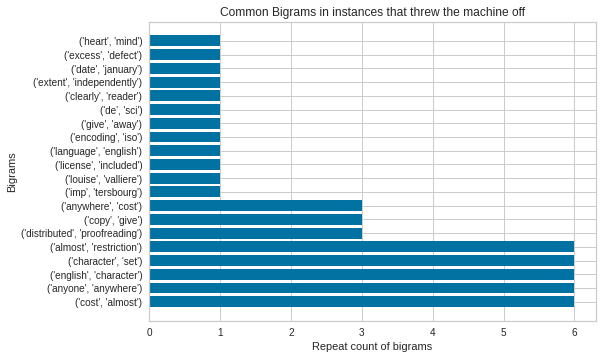

In [180]:
import matplotlib.pyplot as plt

y_axis = []
x_axis = []


for i in range(len(C.most_common(20))):
  y_axis.append(str(C.most_common(20)[i][0]))
  x_axis.append(C.most_common(20)[i][1])

plt.barh(y_axis,x_axis)
plt.title('Common Bigrams in instances that threw the machine off')
plt.xlabel('Repeat count of bigrams')
plt.ylabel('Bigrams')
plt.show()